# Анализ моторов

## Постановка задачи
Имеется 80 моторов, каждый из которых живет определенное число циклов. Каждый цикл происходит снятие информации с датчиков S1 – S21 и происходит переустановка настроечных параметров Setting1 – Setting2.
## Необходимо: 
Провести анализ предоставленных данных по 80 моторам (файл Data_80.csv). Сделать предположение о выходе из строя мотора на основании имеющихся данных датчиков. Далее на основании дополнительно предоставленных данных по 20 моторам (файл Data_Add_20.csv) сделать предположения о выходе мотора из строя на следующем цикле.


In [1]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
pd.set_option('display.max_rows', 1200)
pd.set_option('display.max_columns', 105)
pd.set_option('display.width', 1200)
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

Populating the interactive namespace from numpy and matplotlib


In [2]:
motors = pd.read_csv('Data_80.csv',';', decimal=',')

In [3]:
motors.head()

,id,cycle,s1,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s2,s20,s21,s3,s4,s5,s6,s7,s8,s9,setting1,setting2
0,Engine_1,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,641.82,39.06,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004
1,Engine_1,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,642.15,39.00,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003
2,Engine_1,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,642.35,38.95,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003
3,Engine_1,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,642.35,38.88,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000
4,Engine_1,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,642.37,38.90,23.4044,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002


In [8]:
len(motors[motors["id"]== 'Engine_2'])

287

In [9]:
controls_signal = ['s1','s5','s6','s10','s16','s18','s19']
sensors_signal = ['s2','s3','s4','s7','s8','s9','s11', 's12','s13','s14','s15','s17','s20','s21']

<Figure size 1080x504 with 0 Axes>

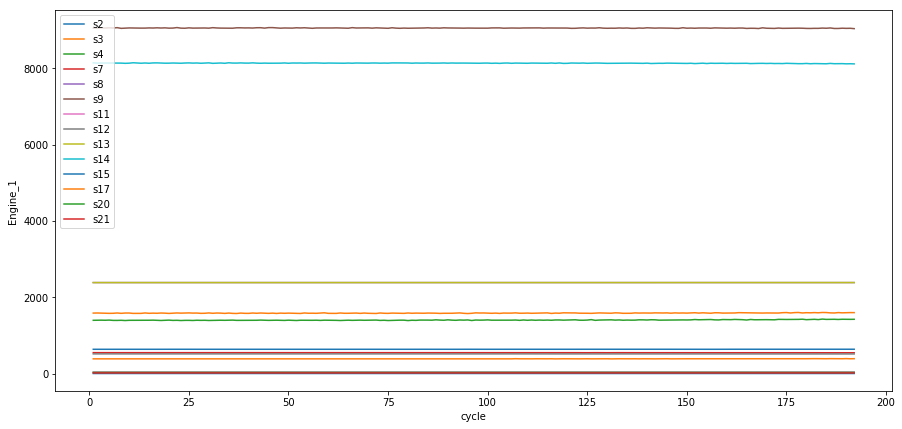

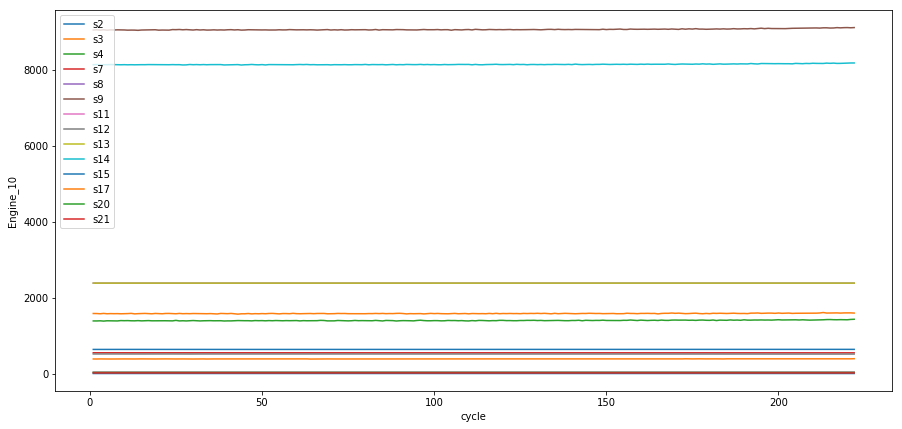

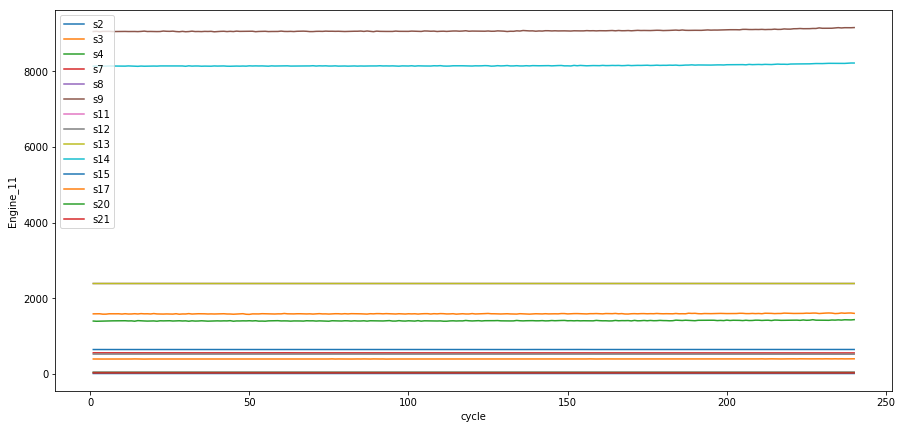

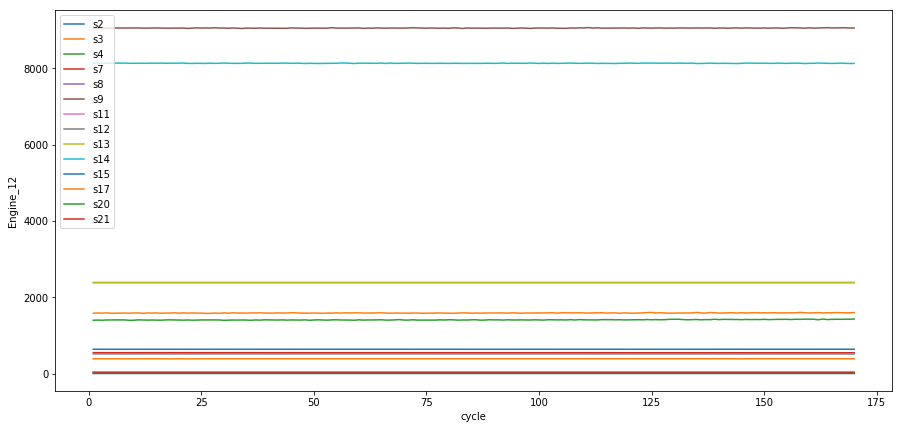

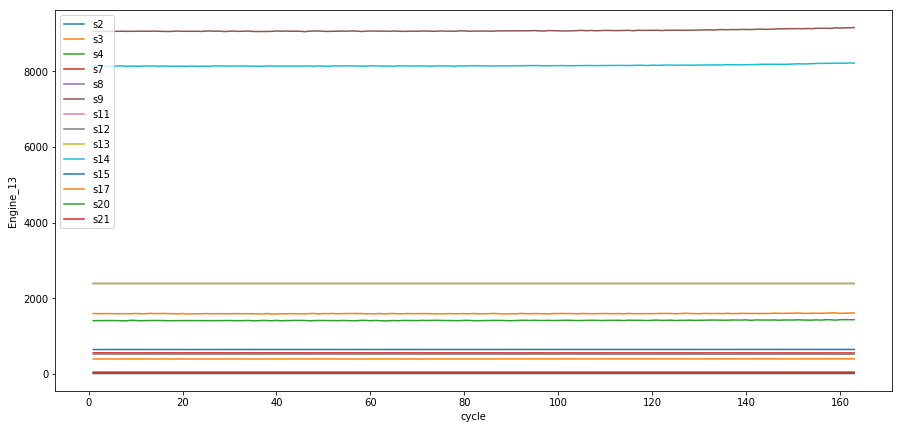

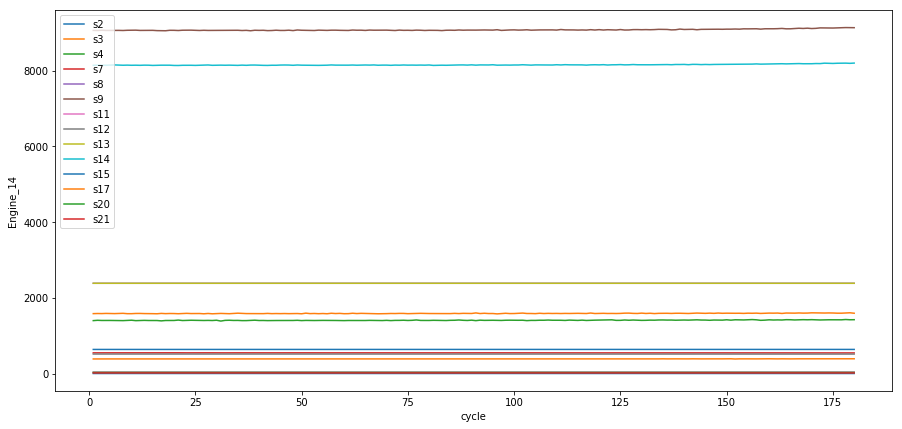

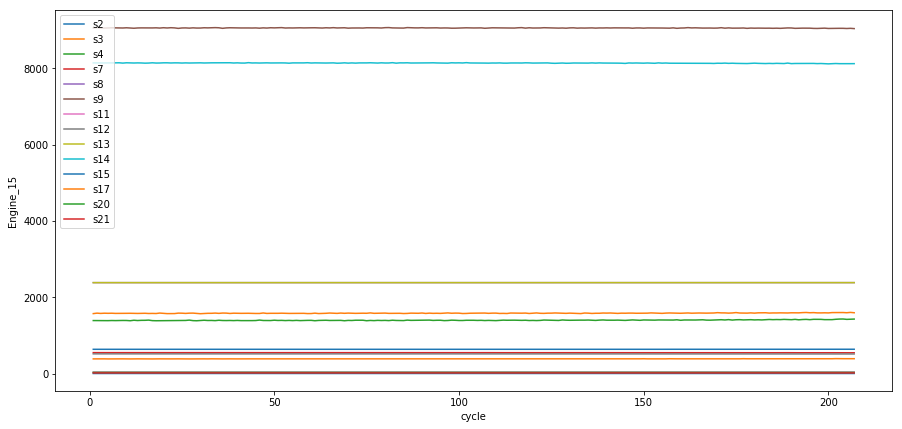

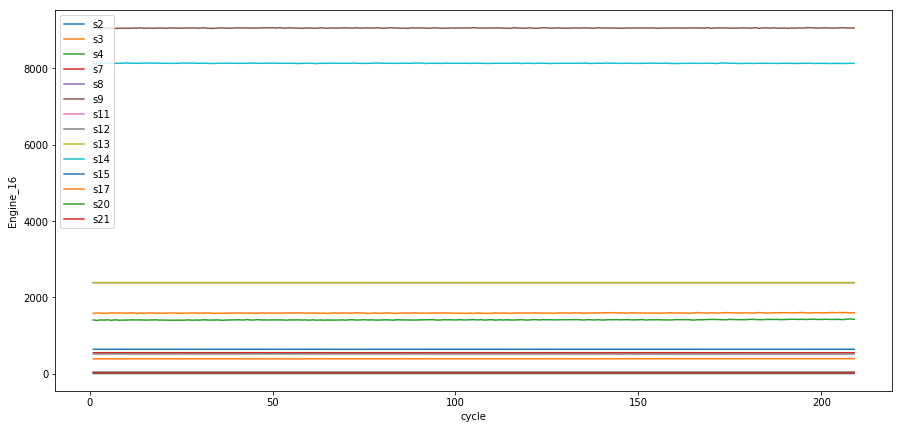

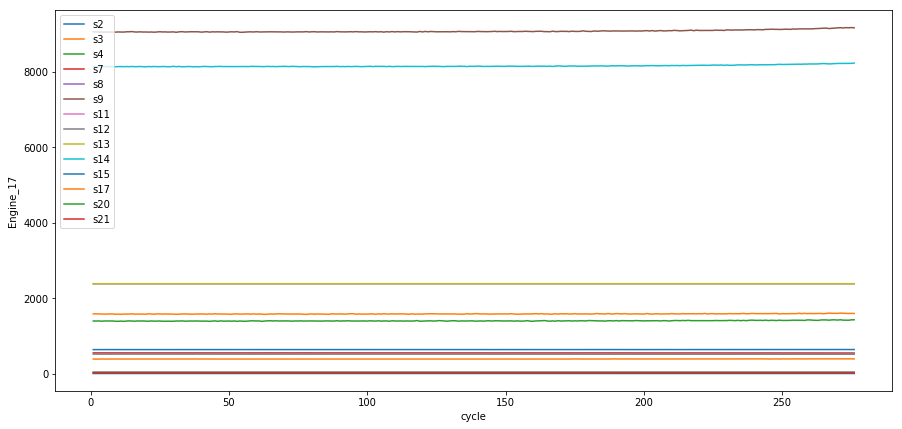

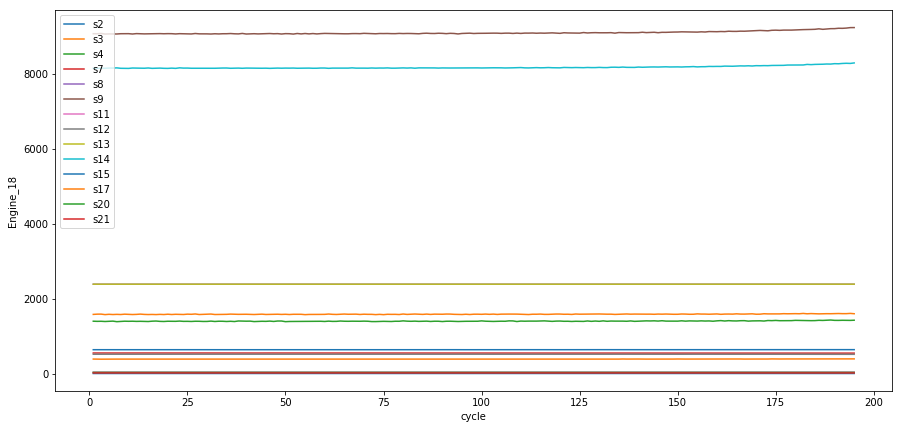

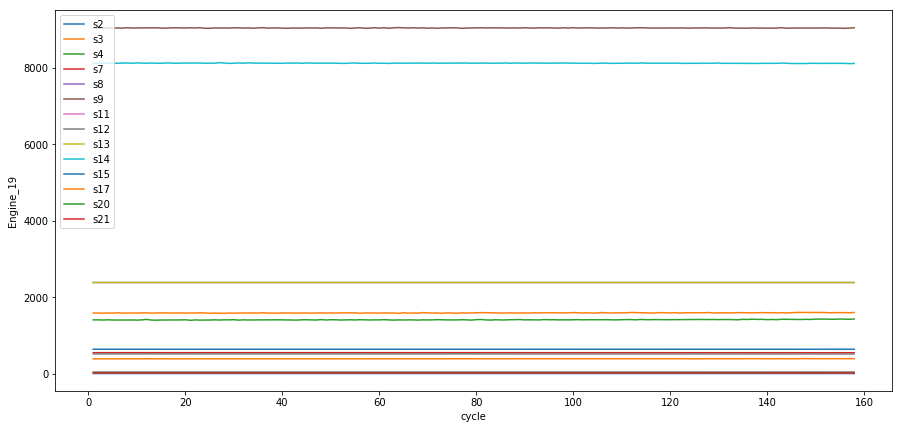

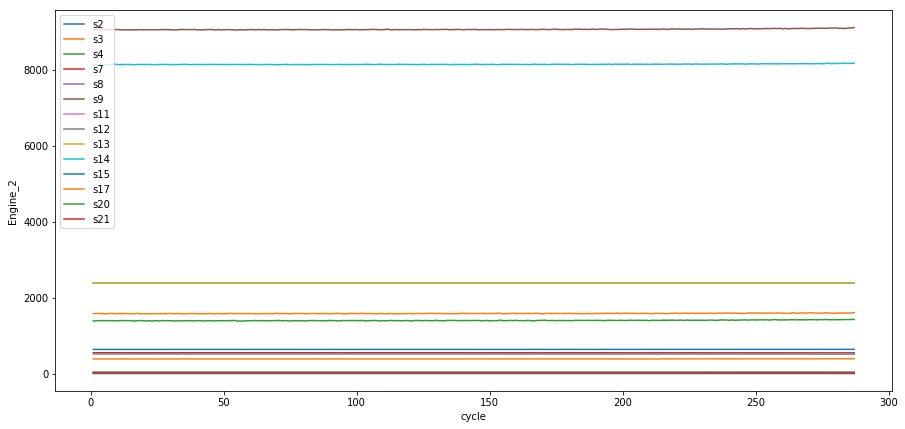

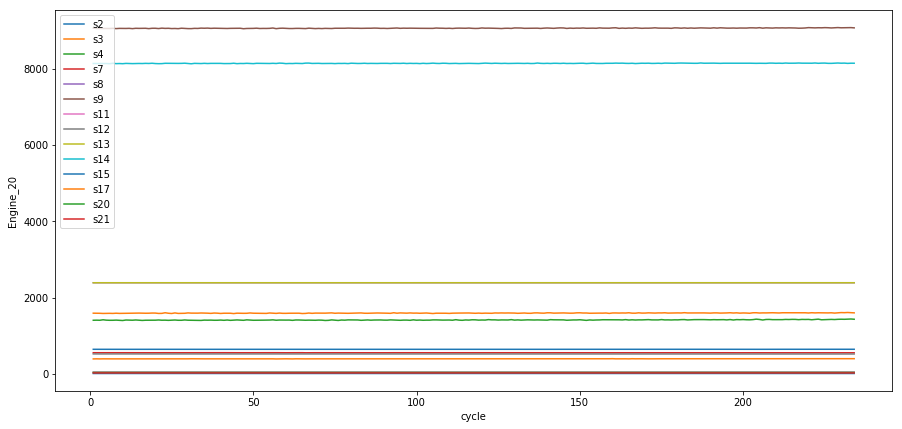

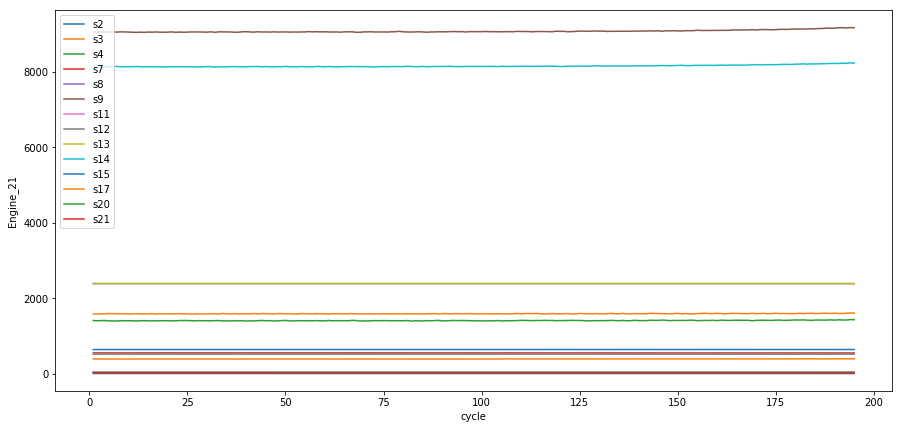

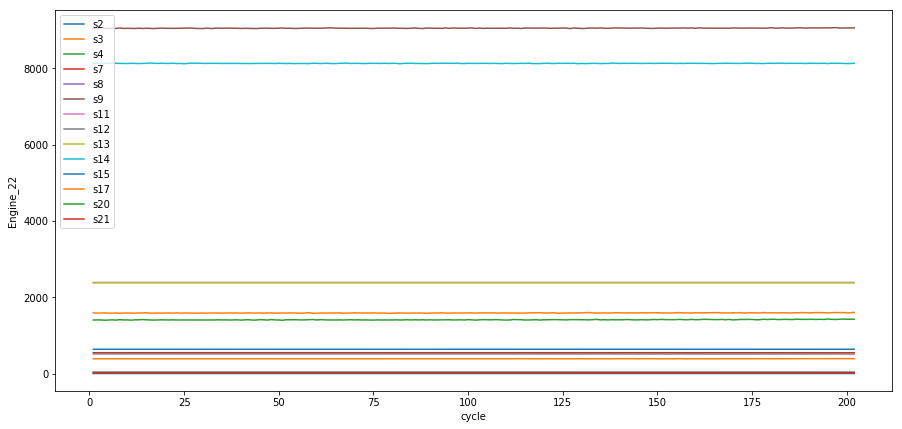

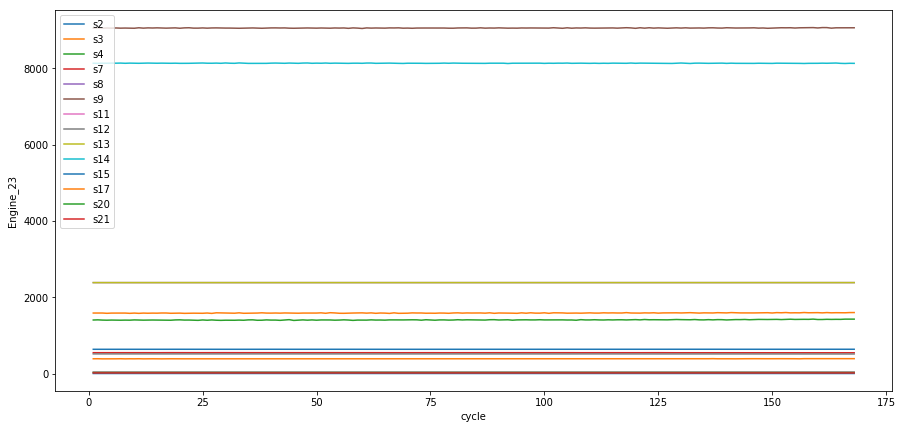

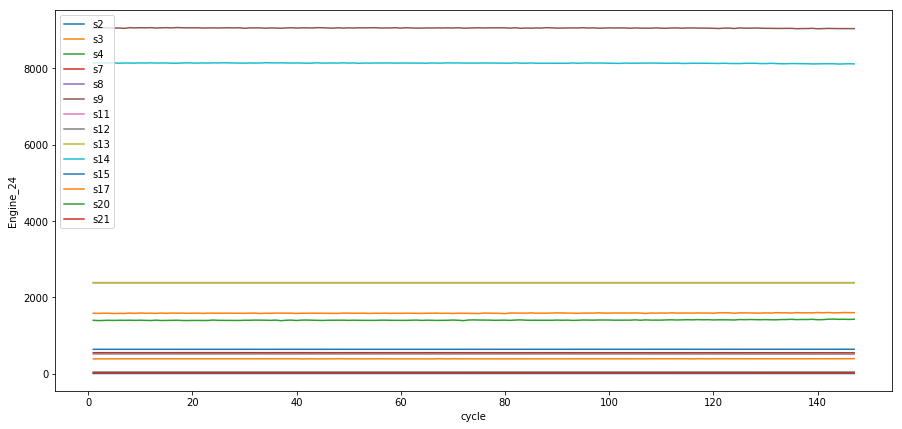

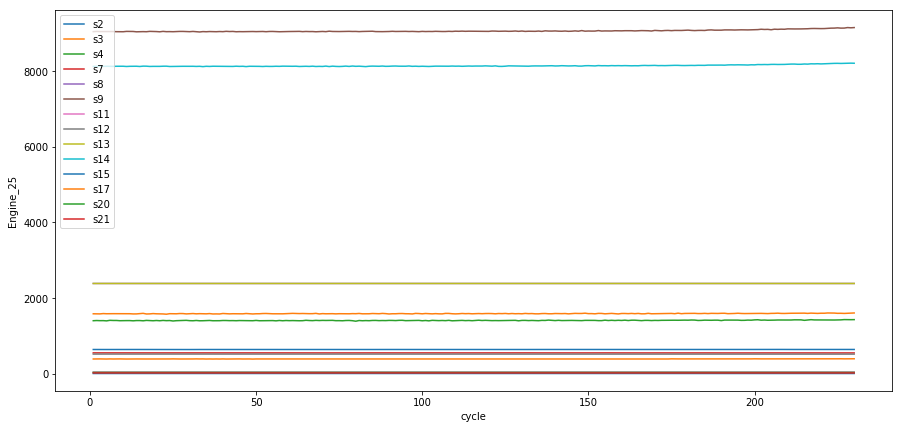

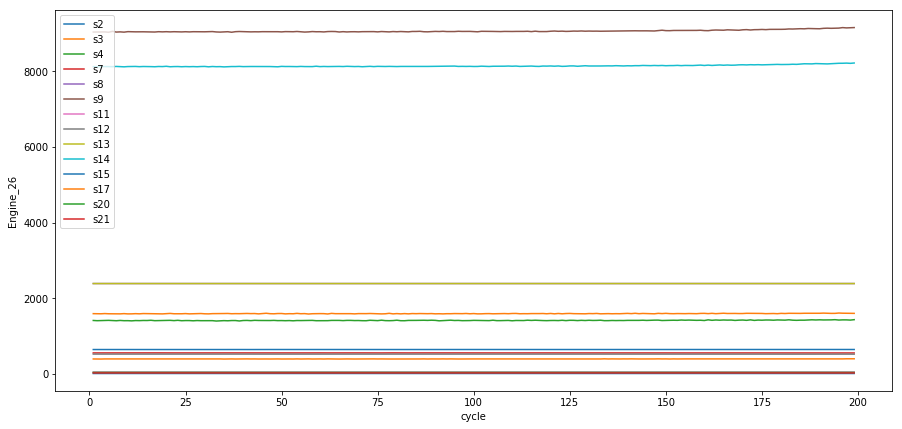

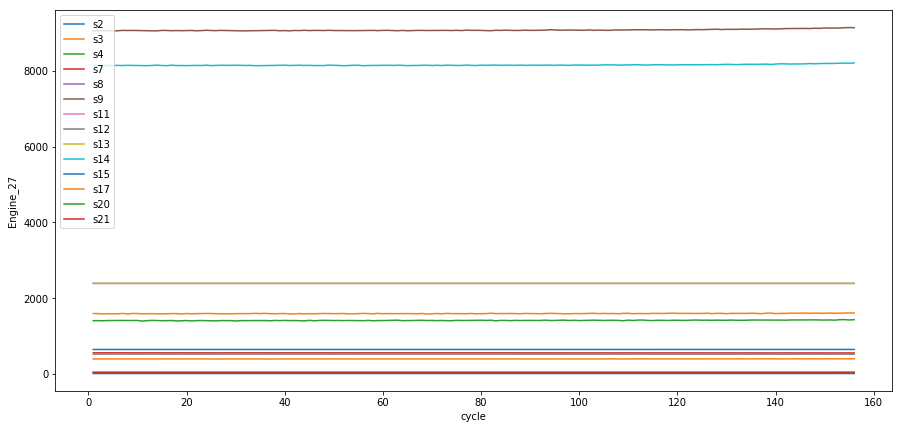

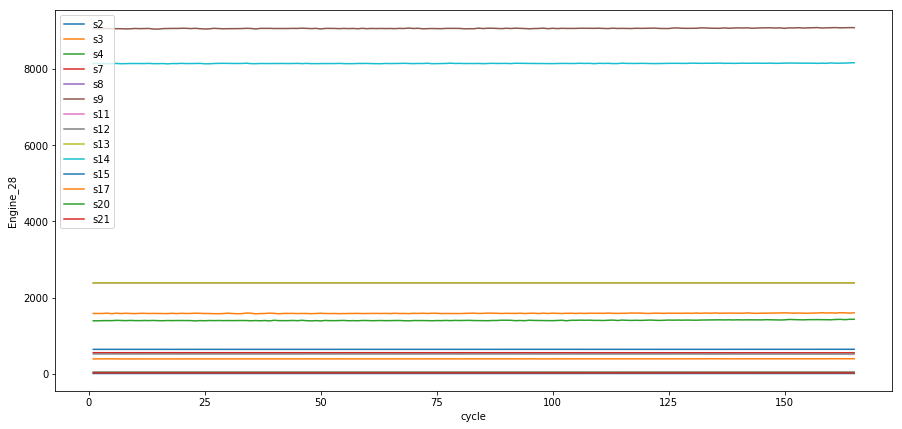

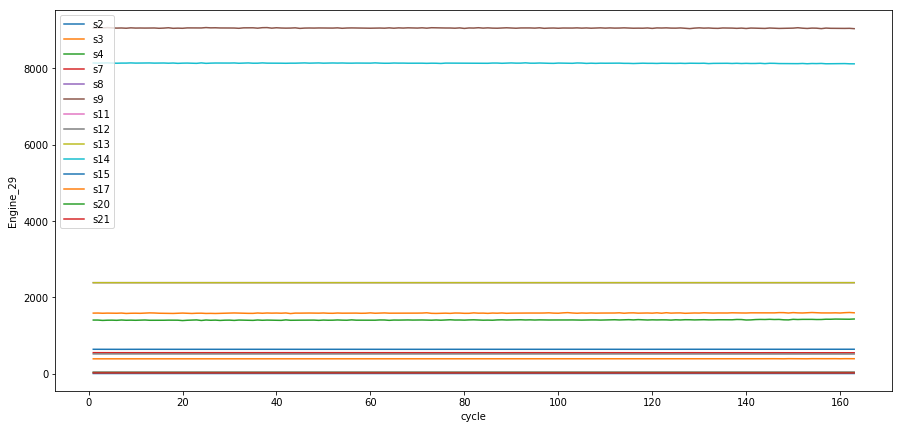

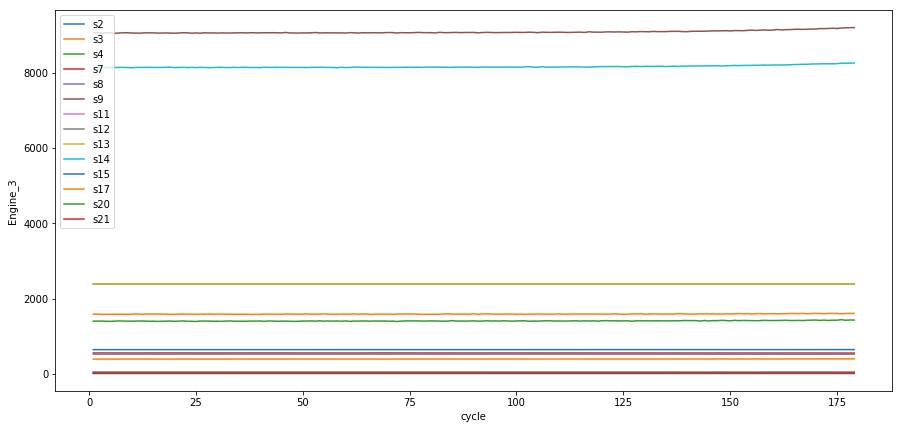

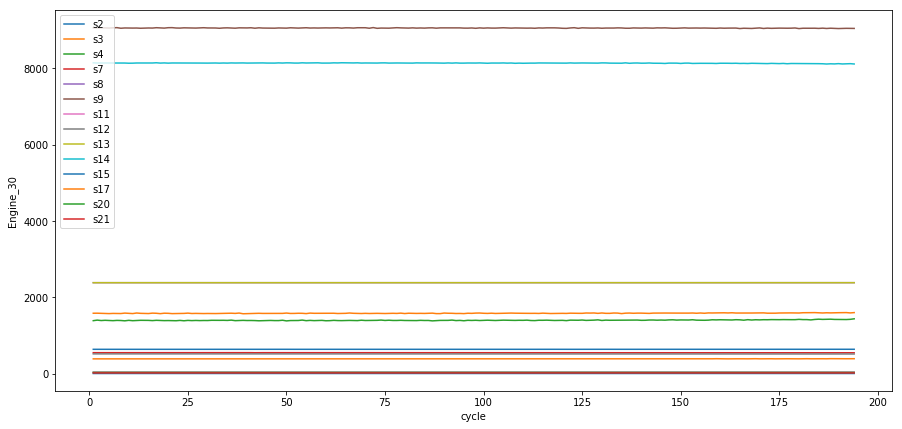

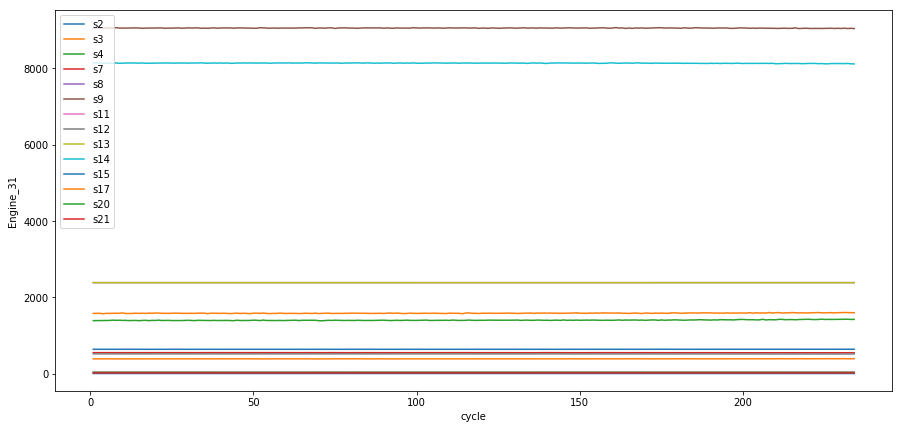

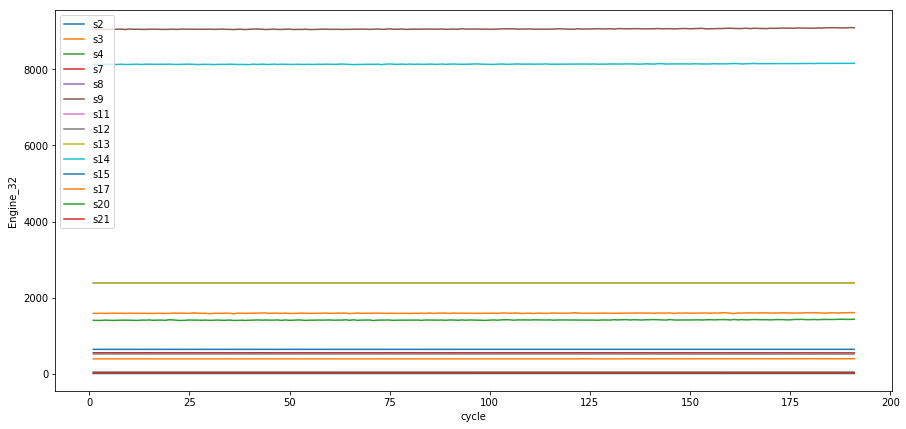

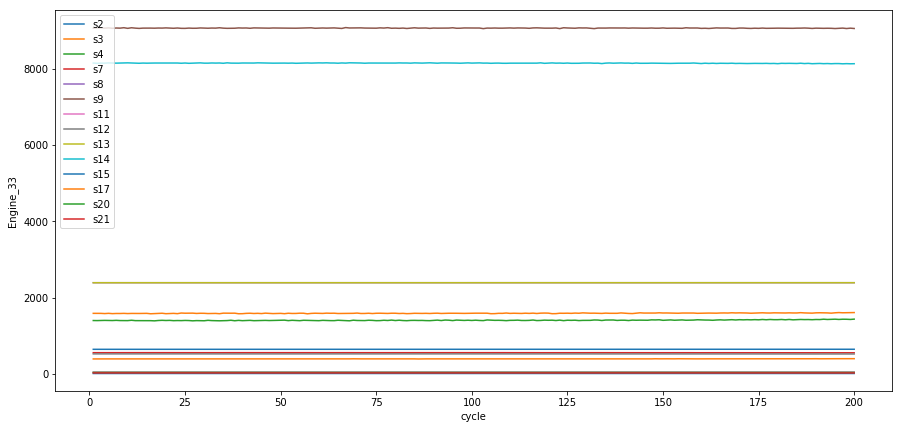

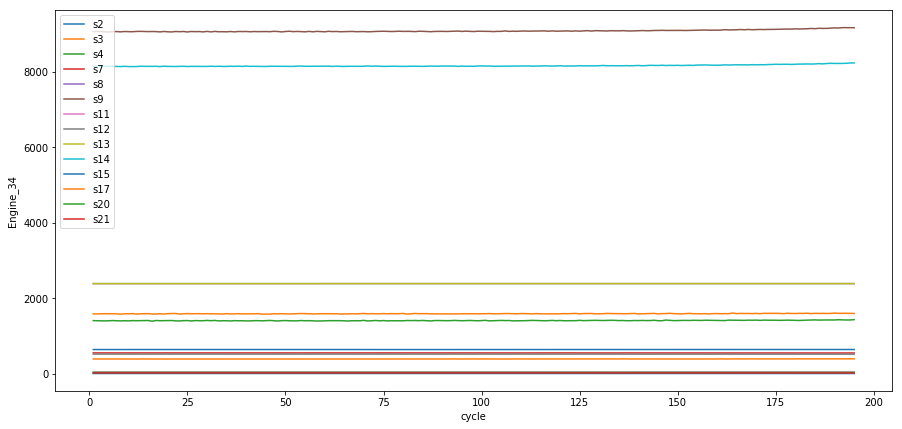

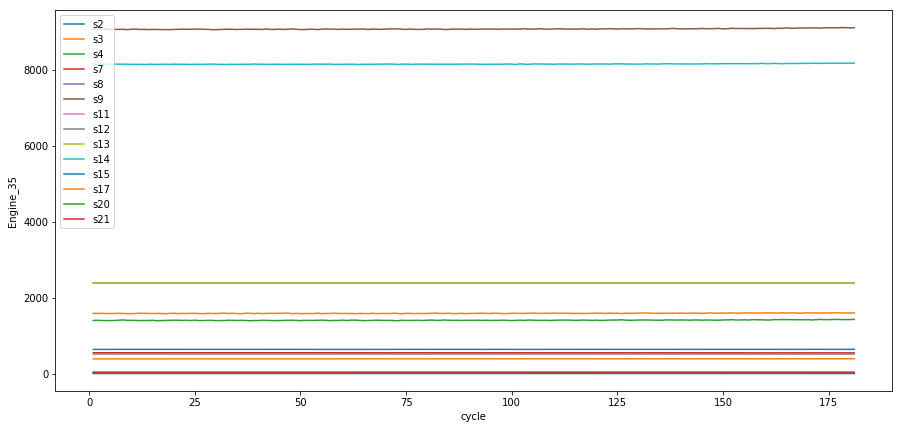

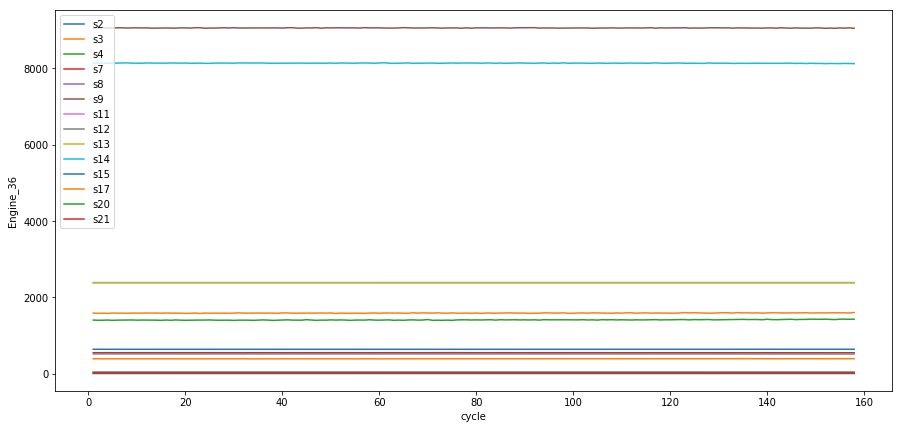

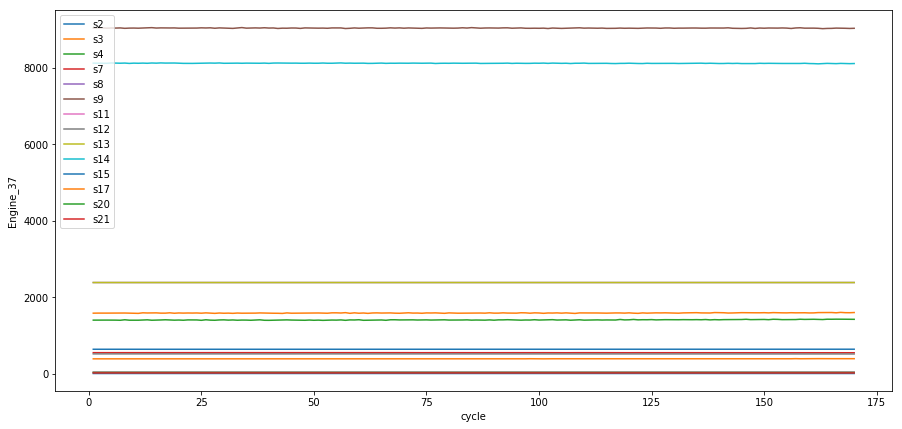

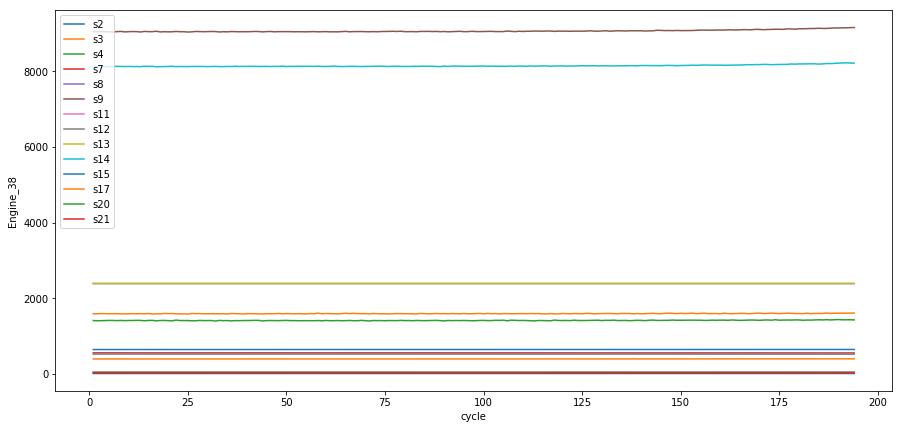

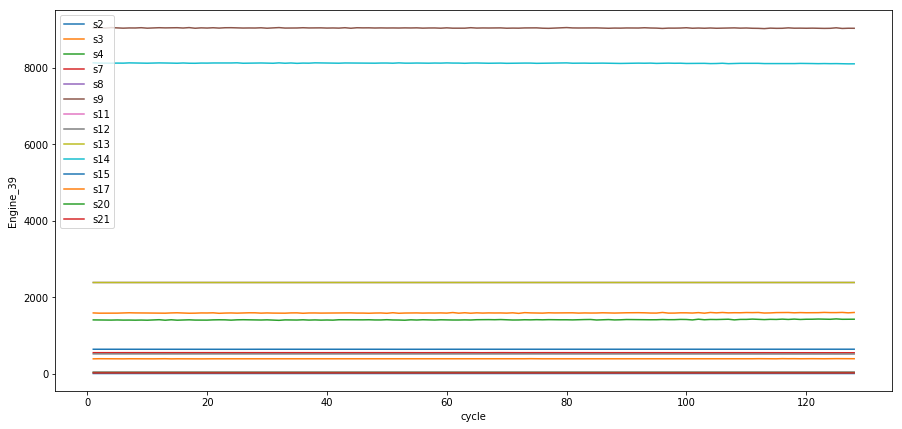

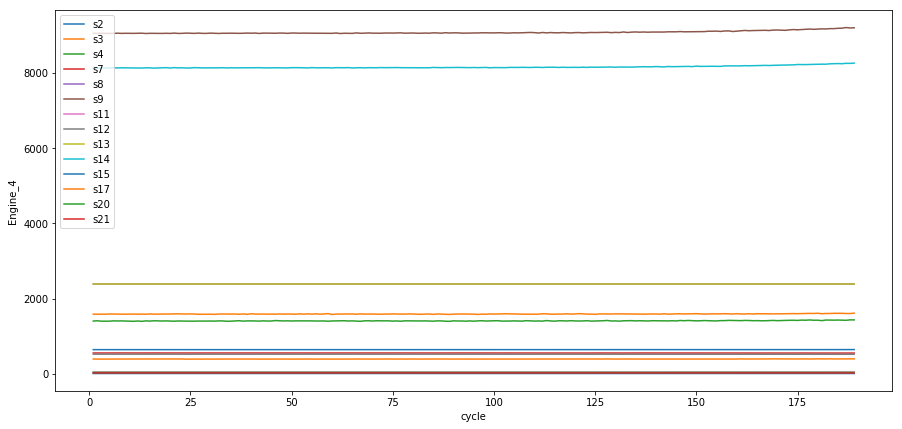

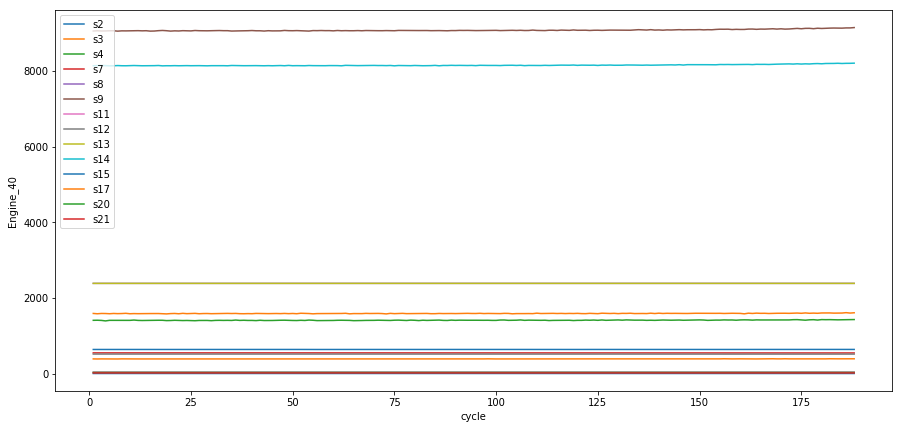

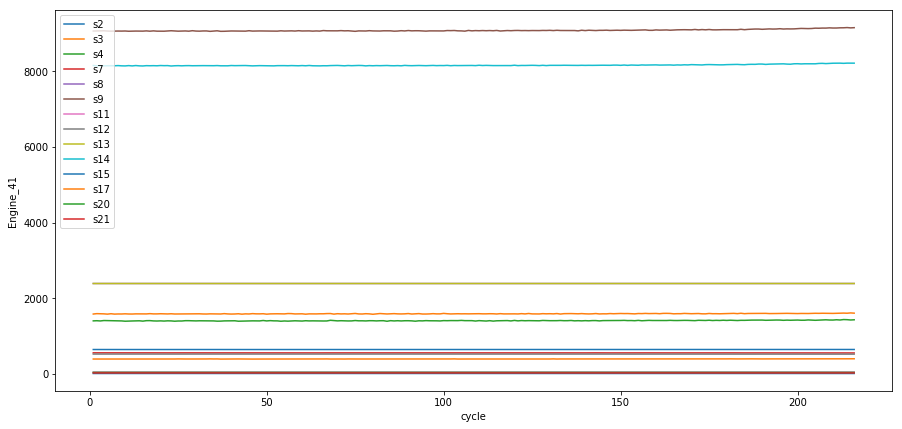

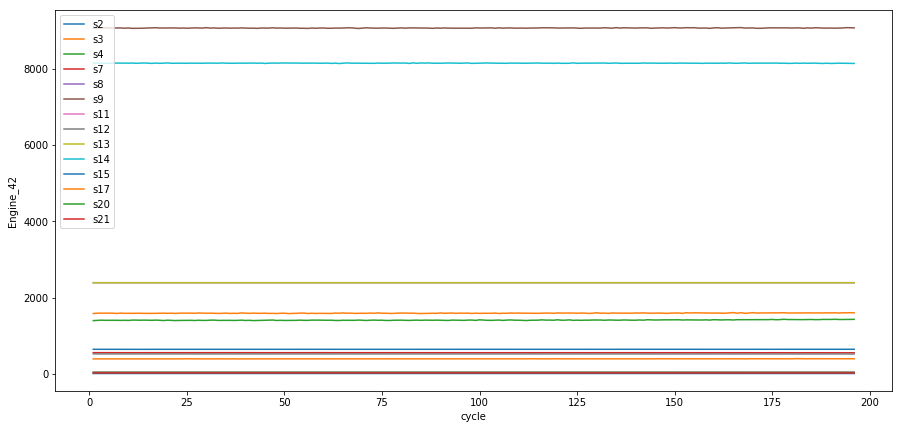

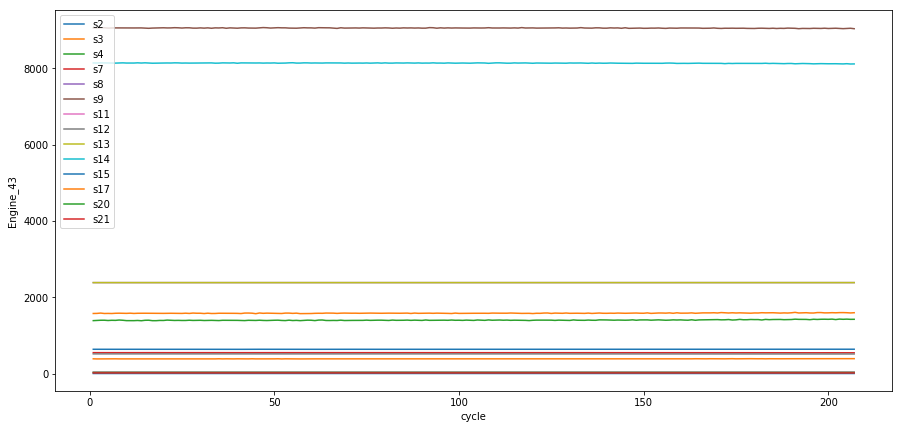

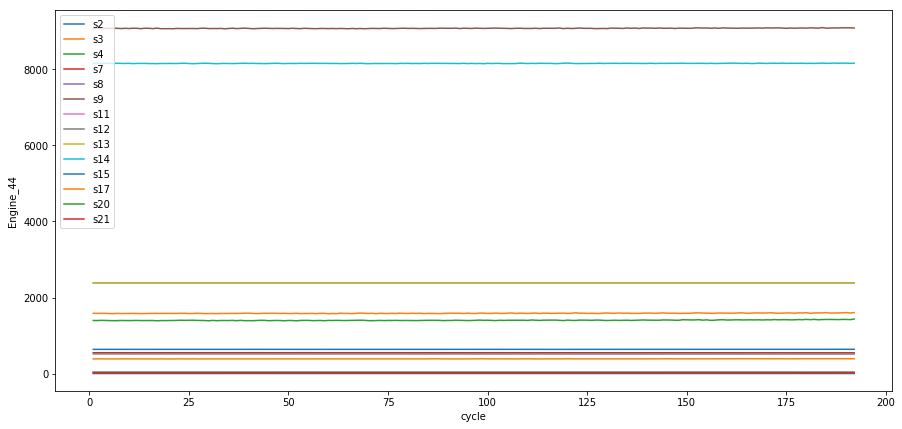

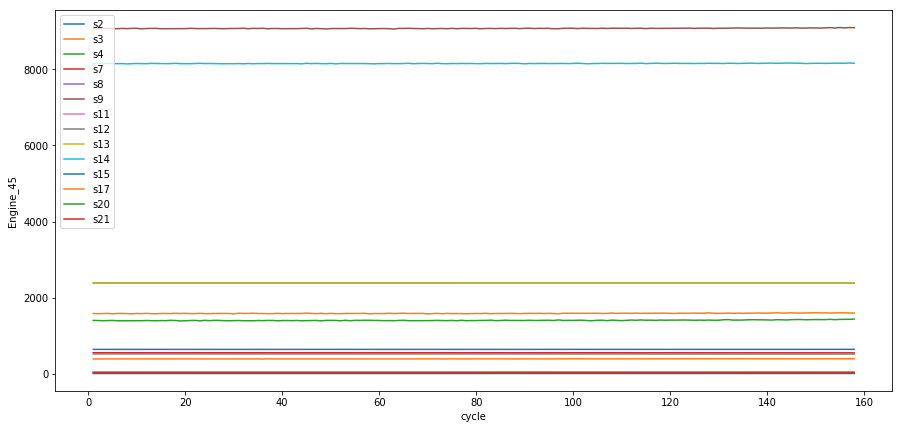

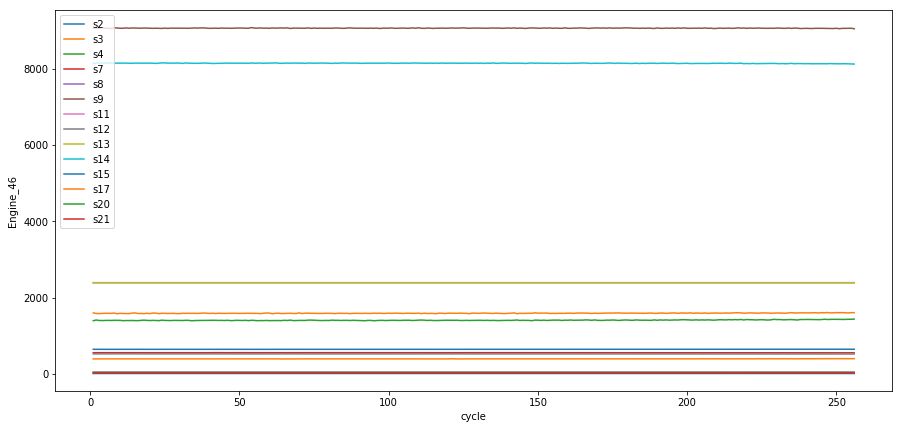

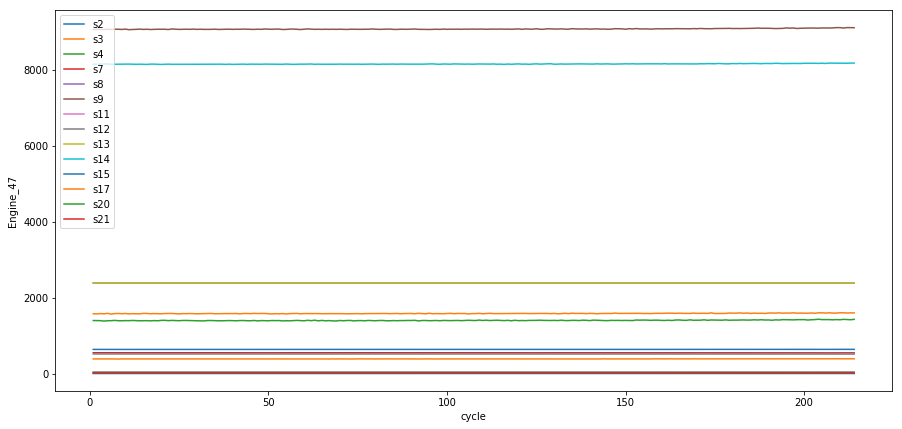

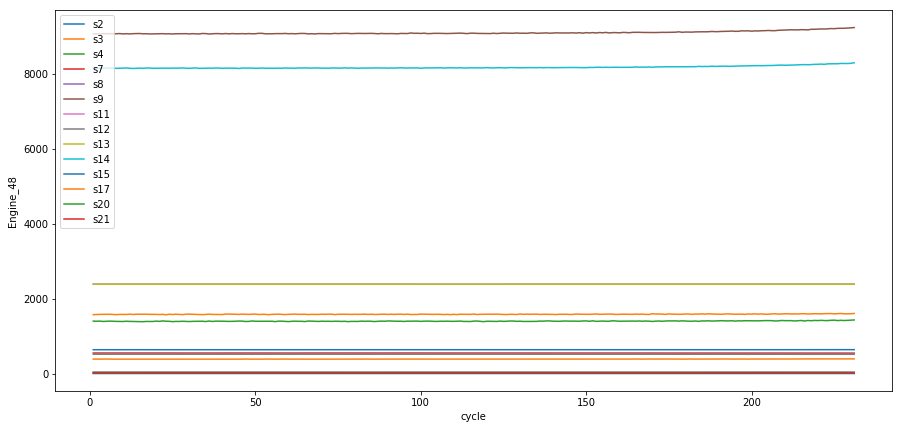

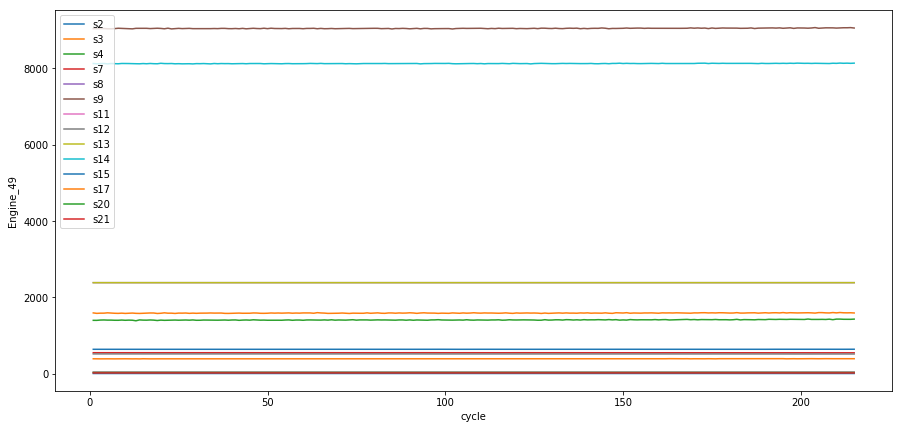

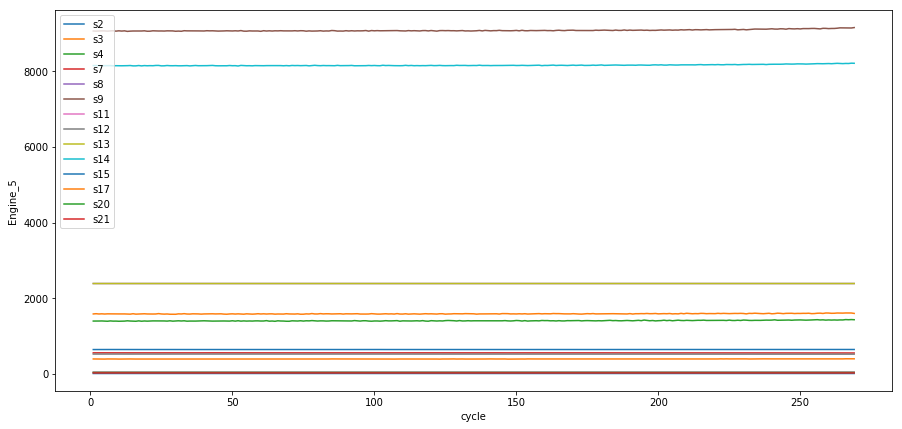

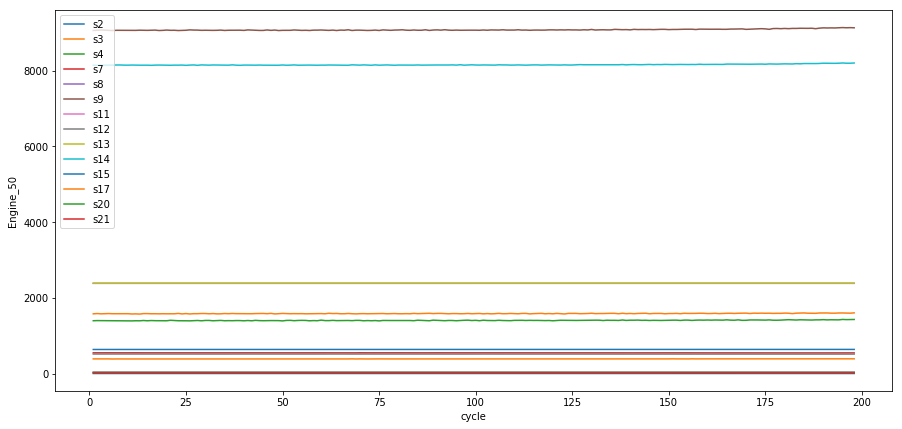

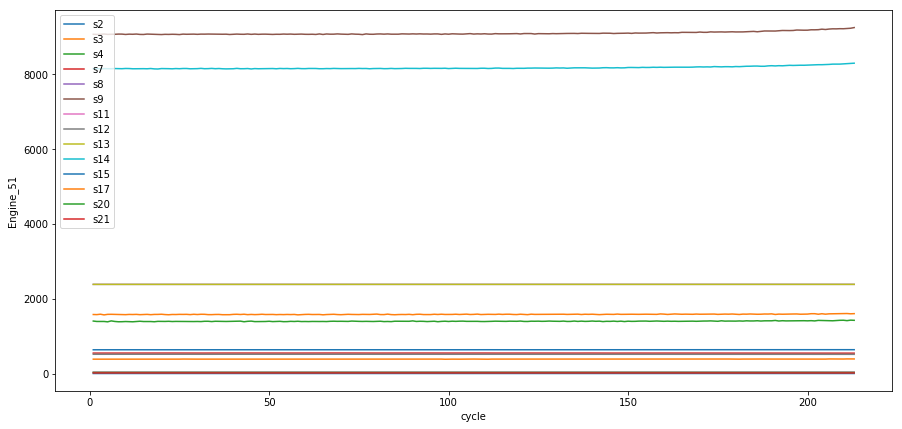

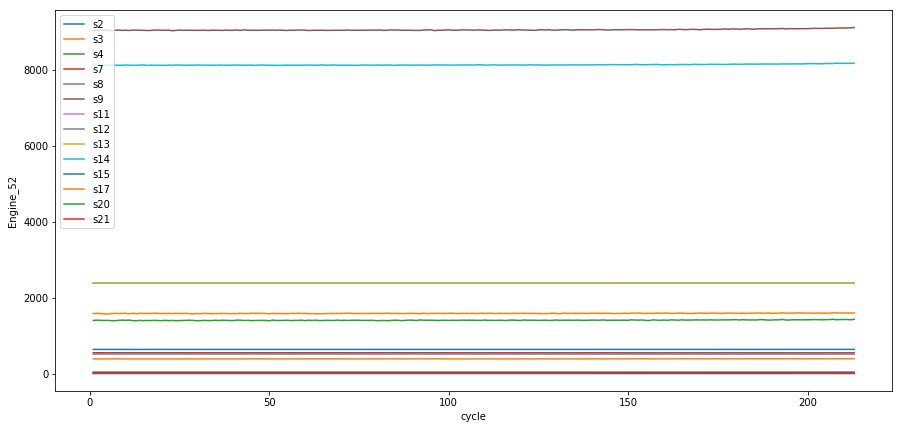

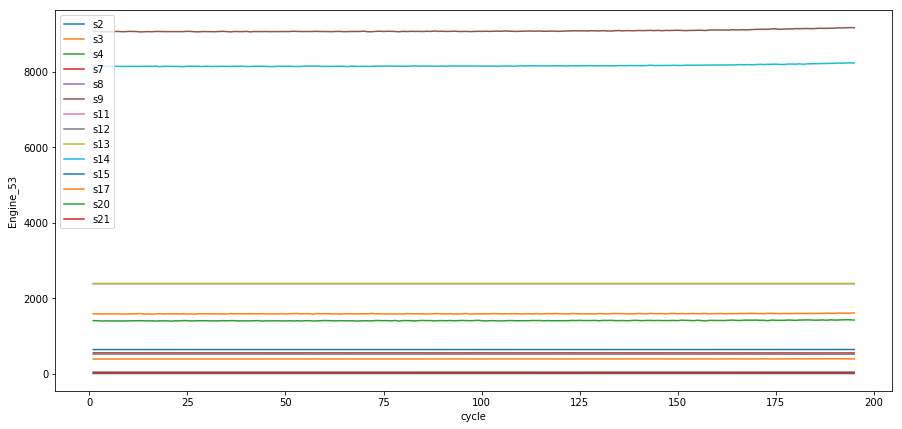

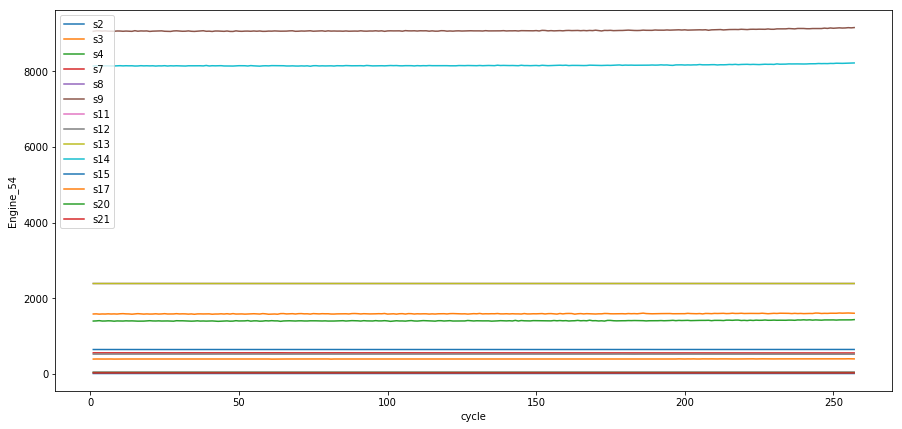

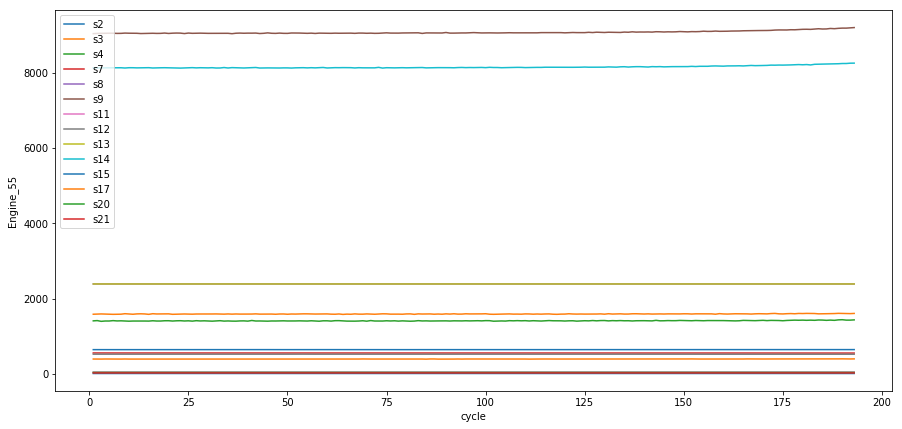

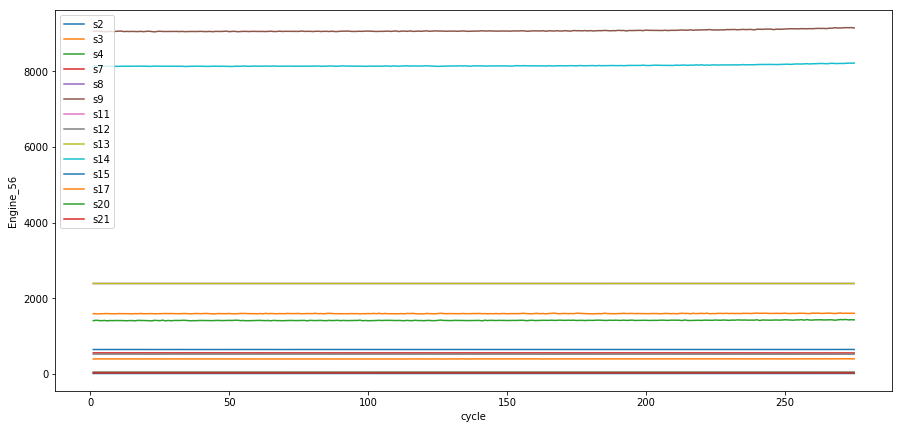

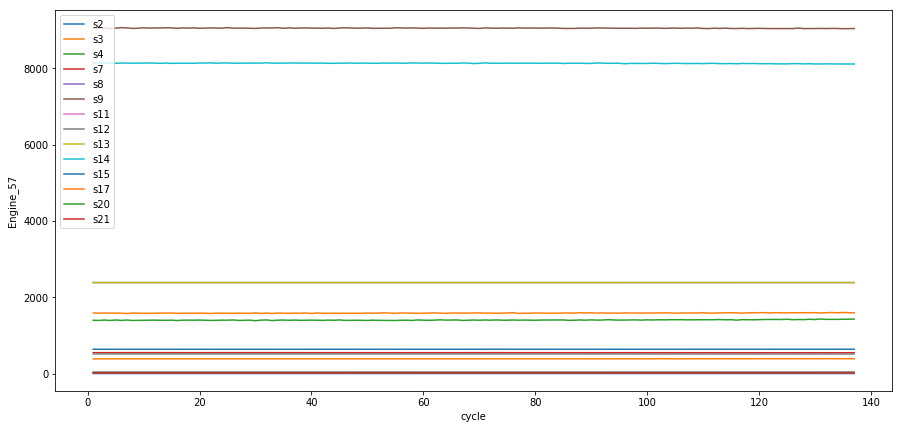

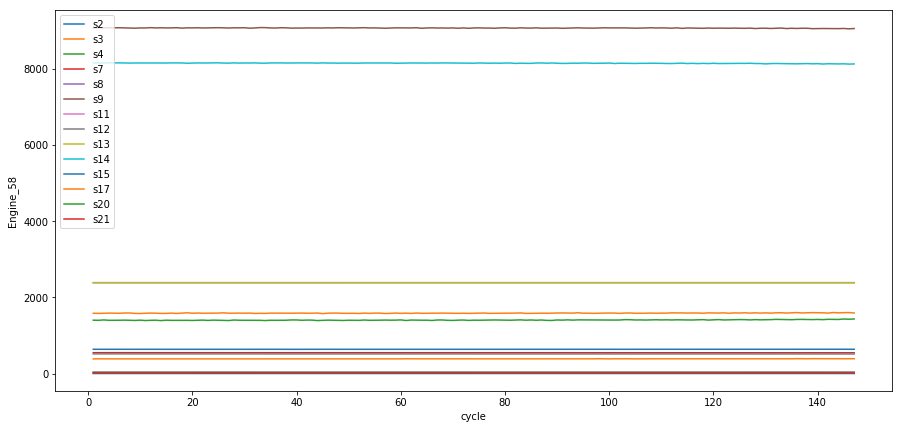

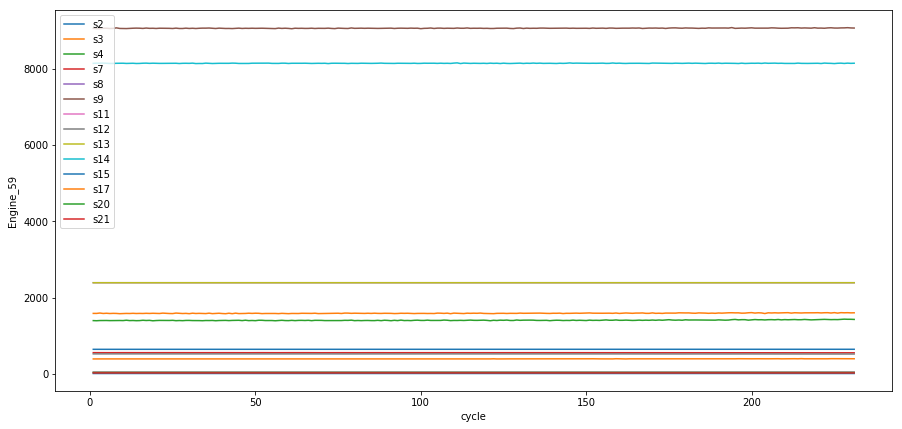

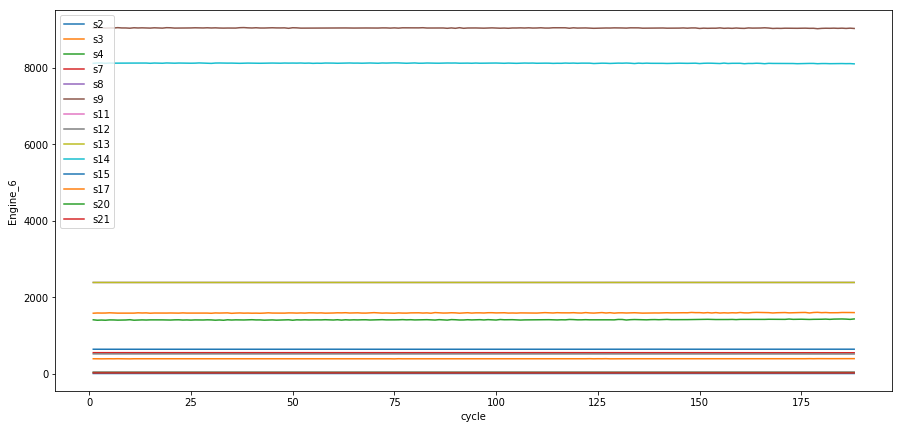

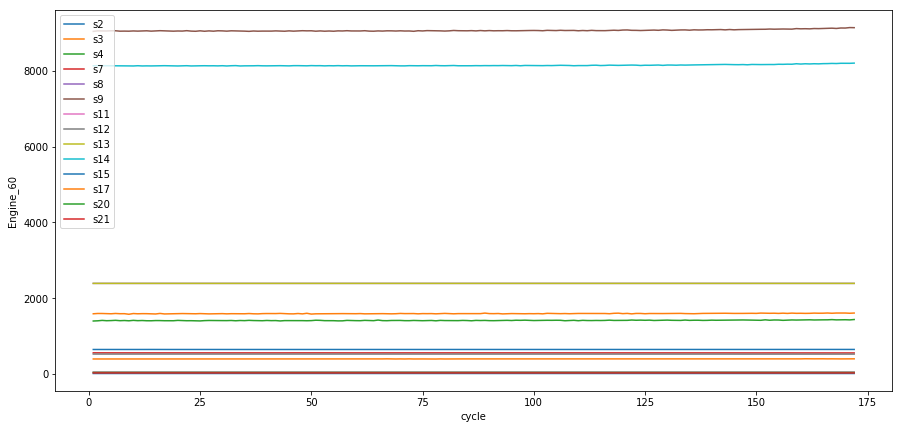

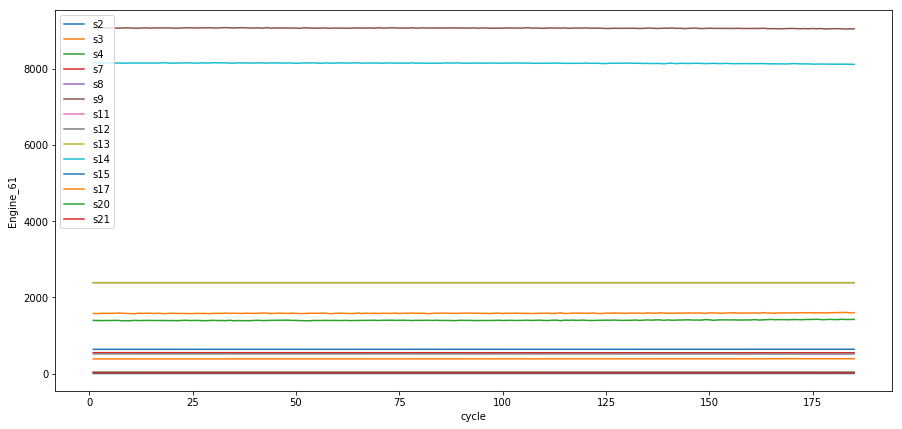

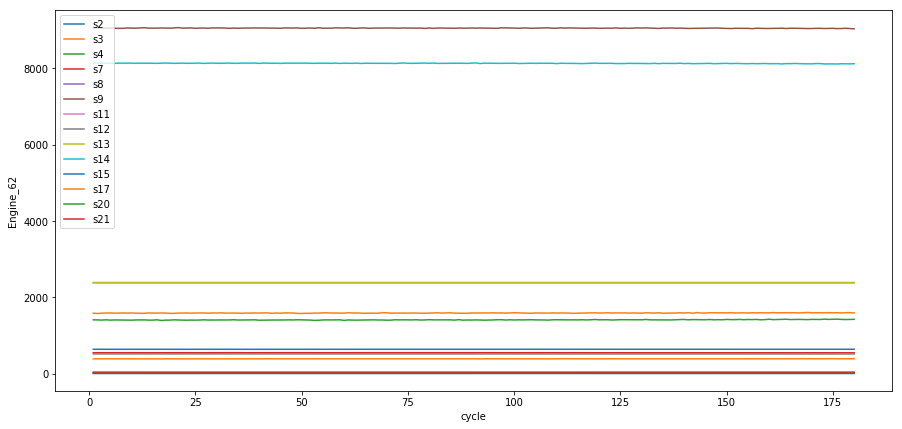

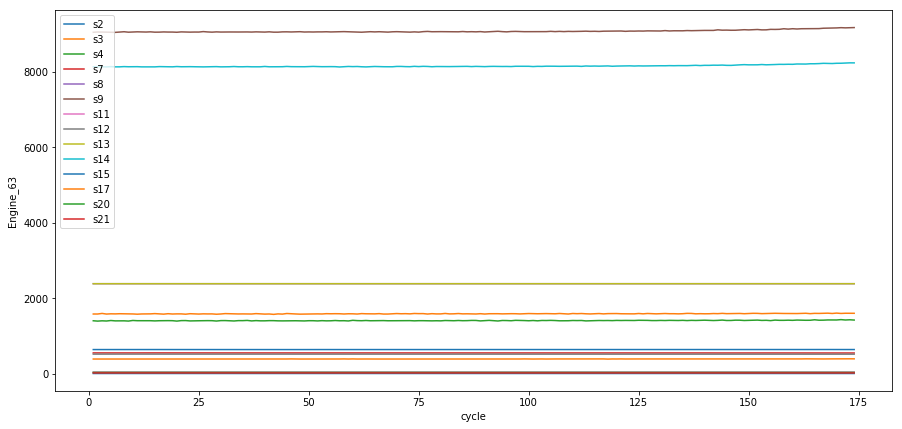

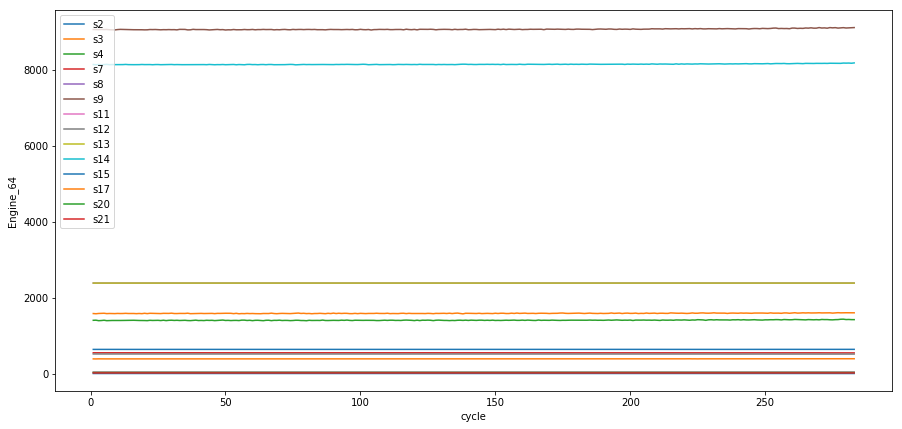

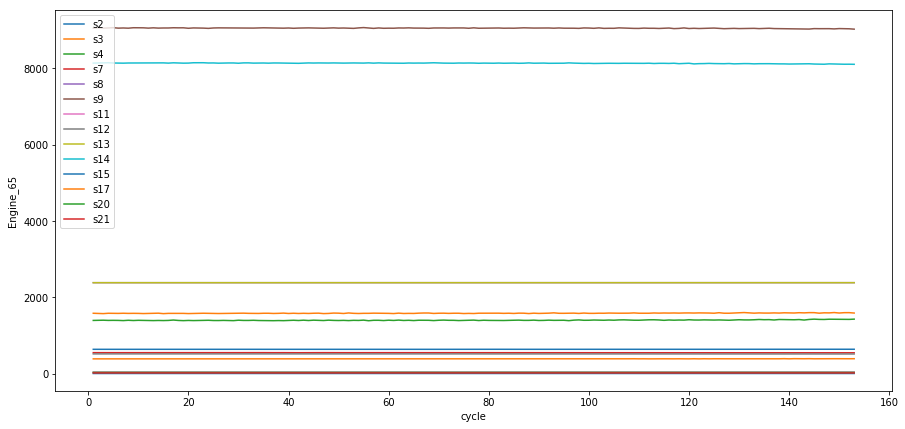

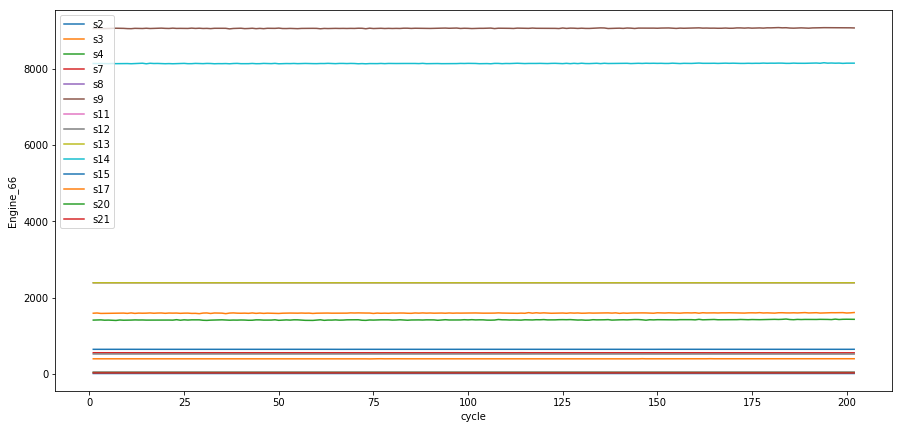

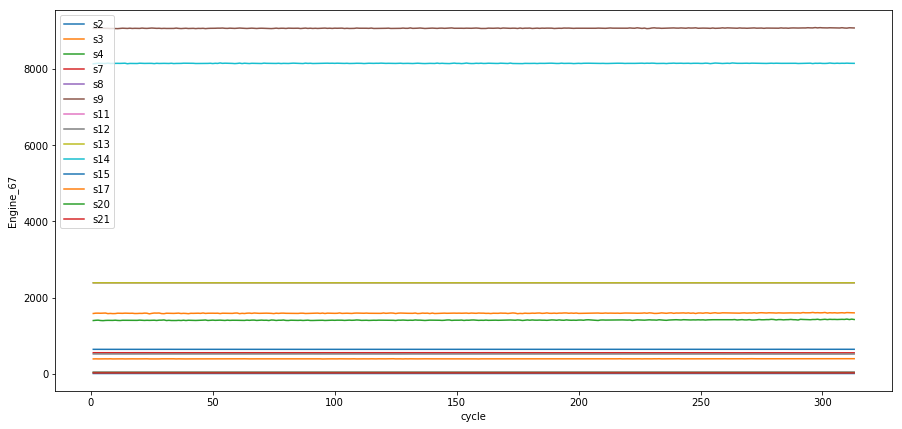

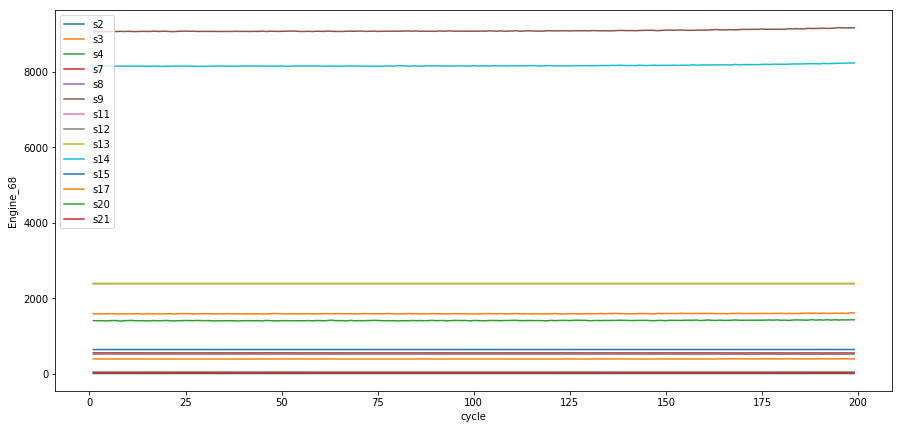

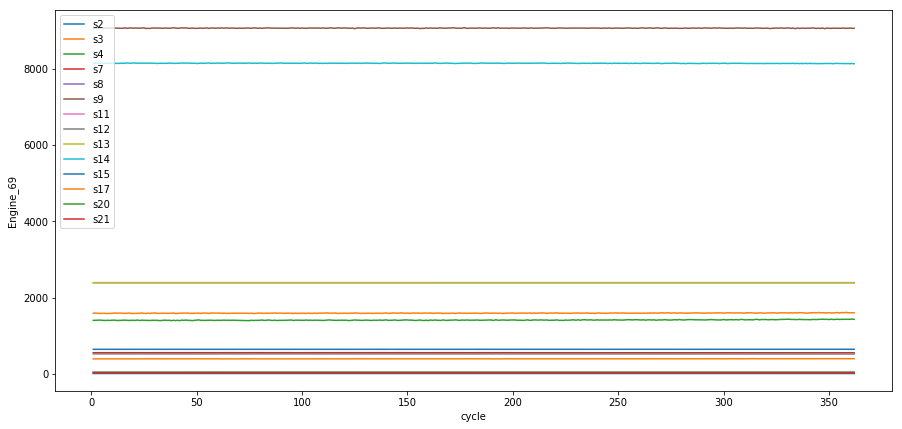

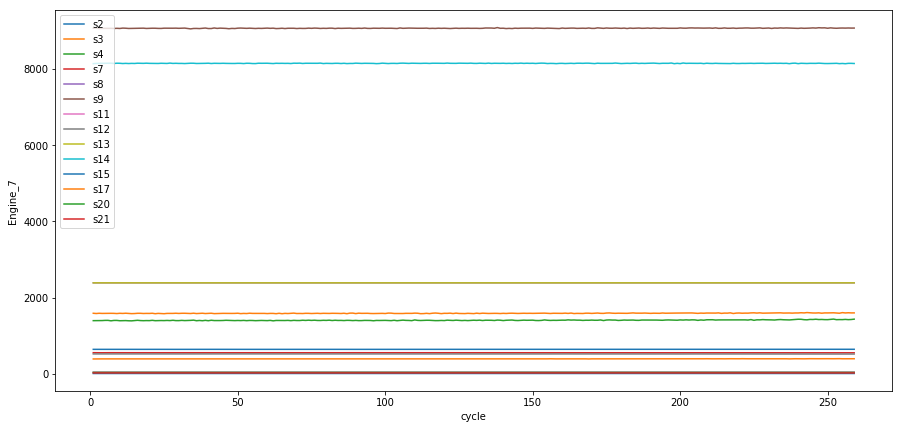

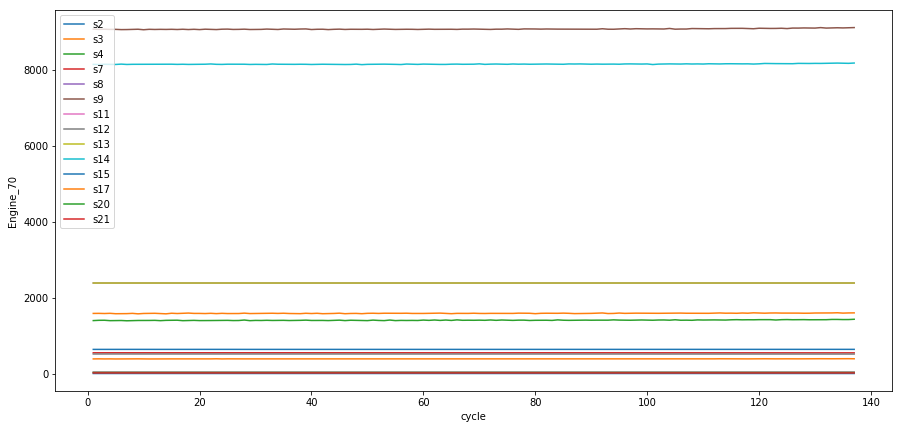

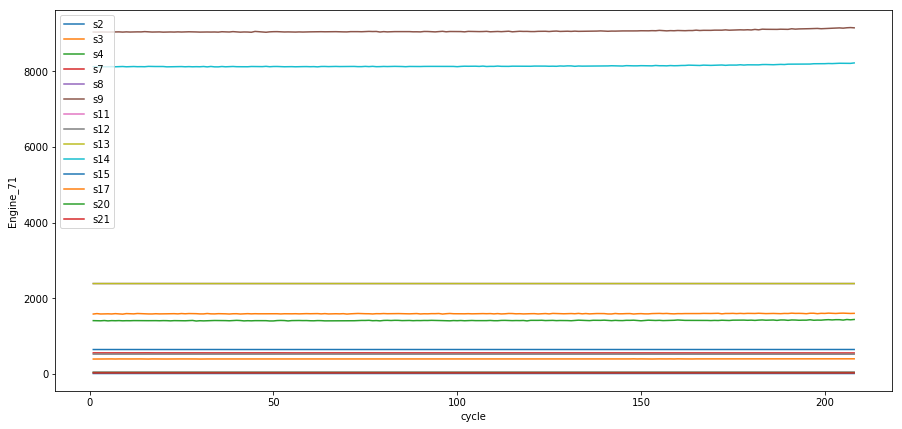

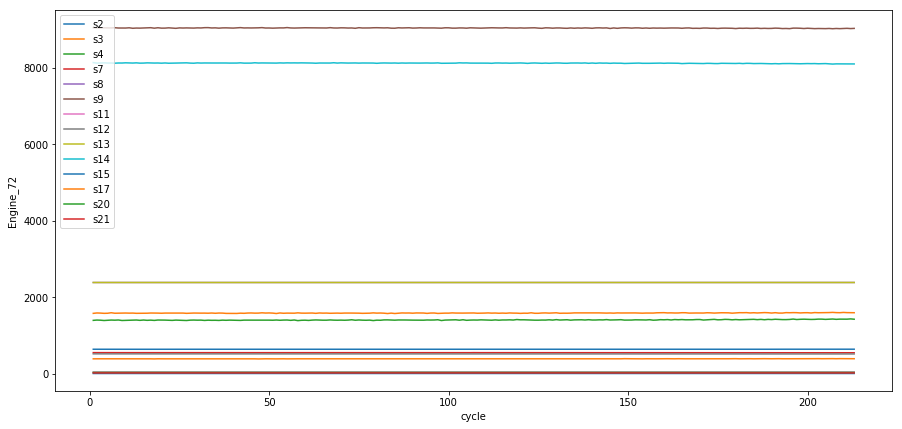

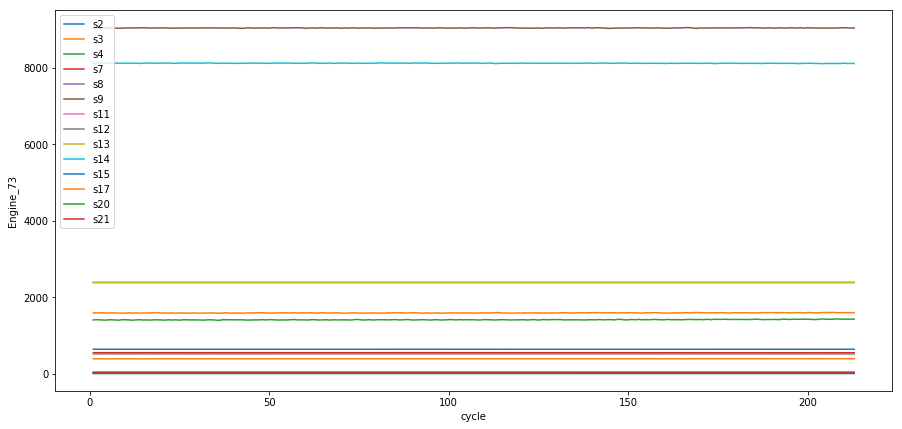

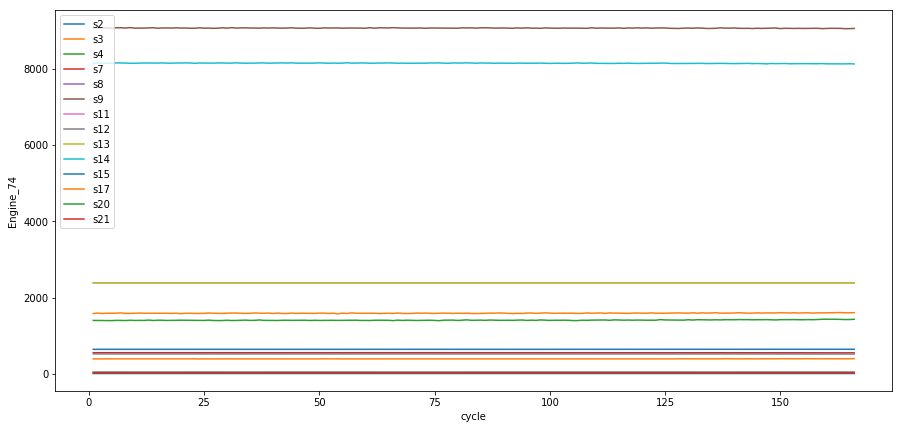

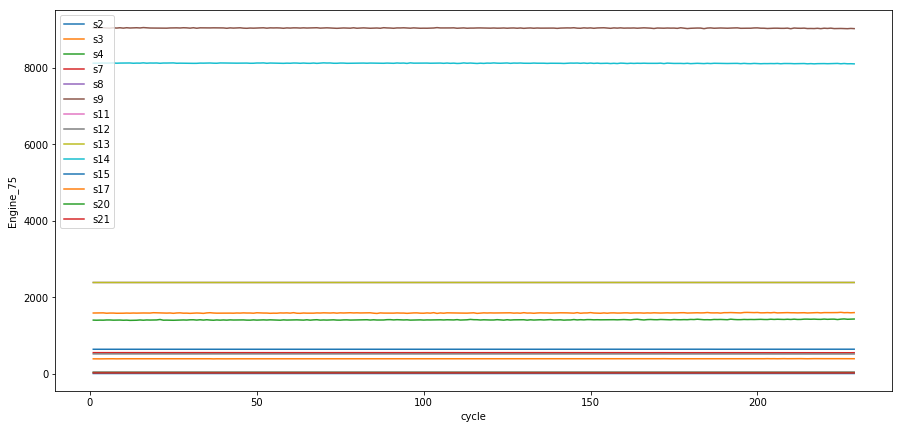

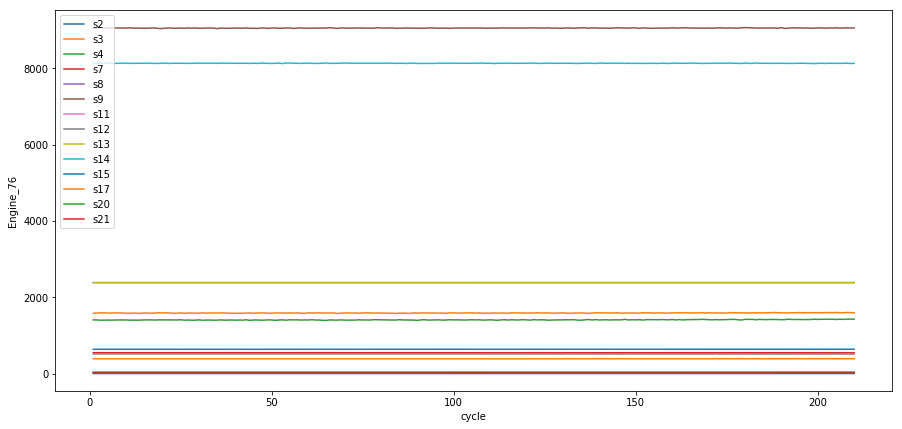

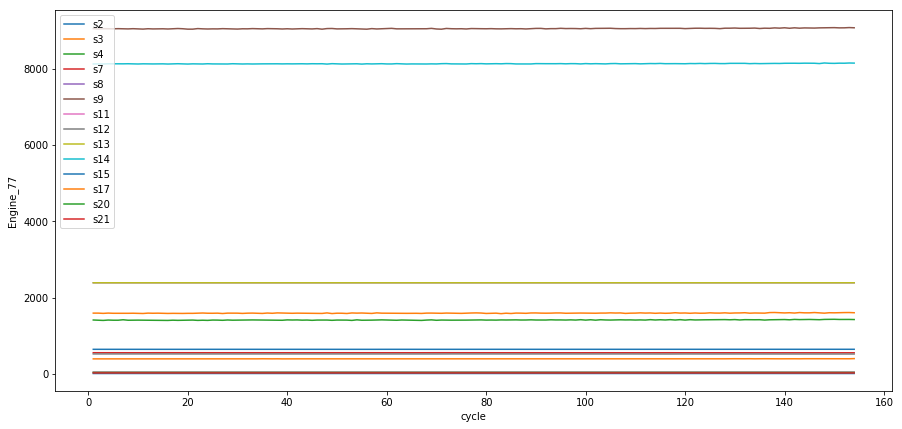

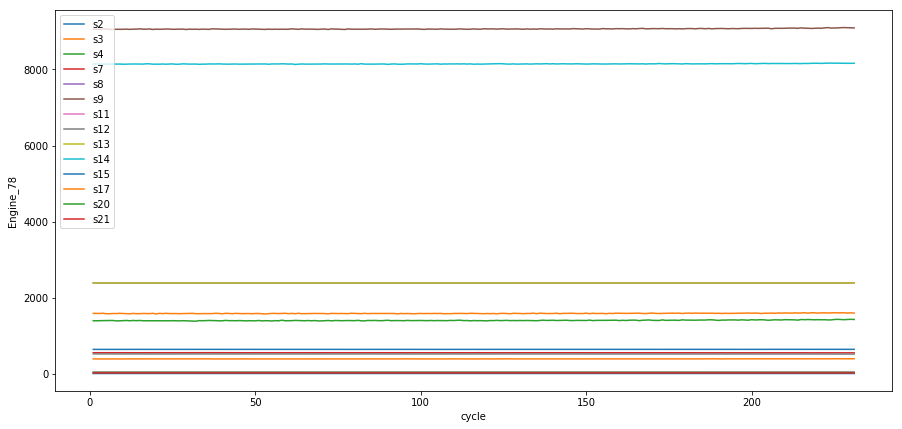

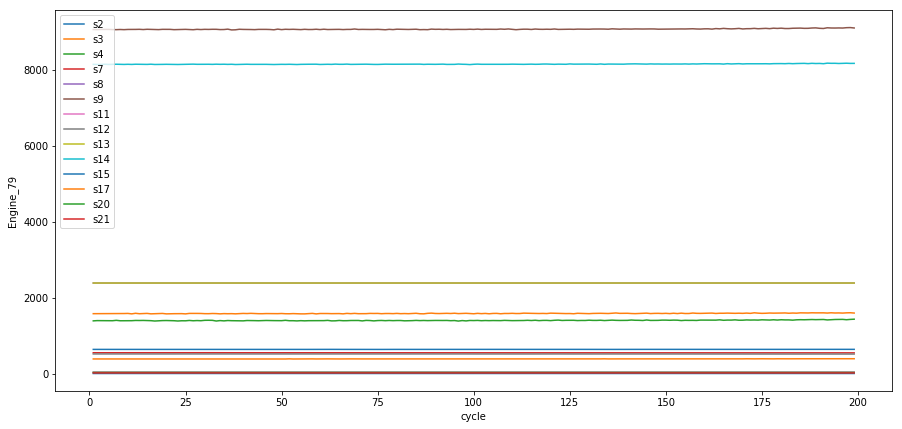

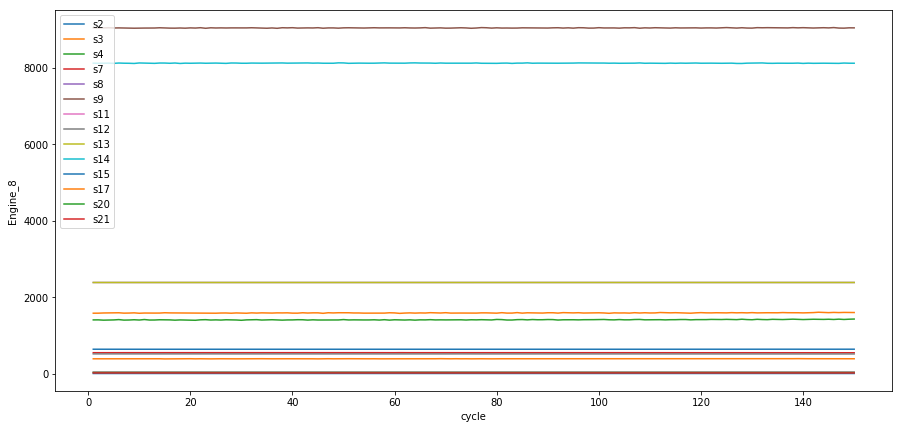

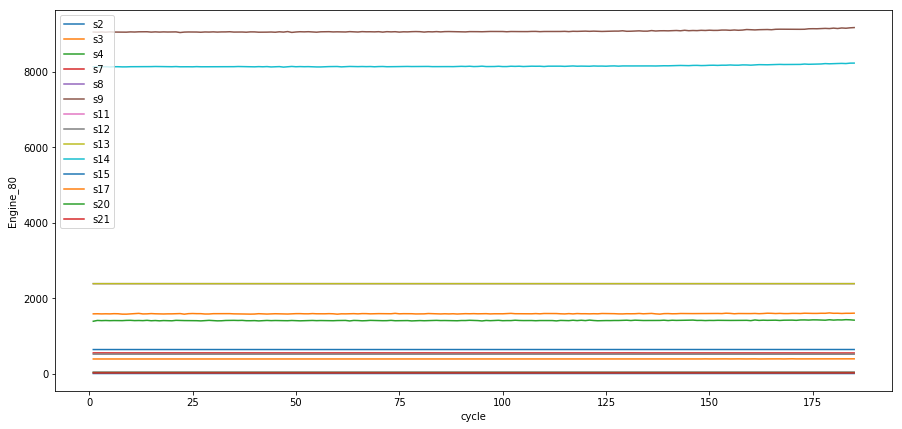

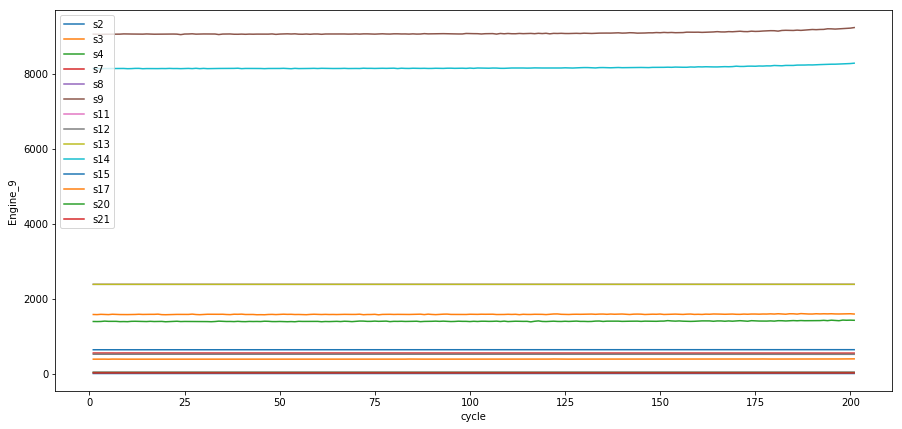

In [10]:
plt.figure(figsize(15,7))
for mot in motors.id.unique():
    #motors[motors["id"]== mot].plot(x='cycle', y =controls_signal)
    motors[motors["id"]== mot].plot(x='cycle', y =sensors_signal)
    plt.ylabel(mot, labelpad=5)
    plt.legend(loc=2)
    pylab.show()

In [21]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
%pylab inline
rng = np.random.RandomState(42)
plt.figure(figsize(15,7))
# Generate train data
X = 0.3 * rng.randn(100, 3)
print("X",X)
X_train = np.r_[X + 2, X - 2]
#print('X_train', X_train)
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 3)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 3))

# fit the model
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
print(y_pred_outliers)
# plot the line, the samples, and the nearest vectors to the plane
xx, yy, zz = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

Automatically created module for IPython interactive environment
Populating the interactive namespace from numpy and matplotlib
X [[ 0.14901425 -0.04147929  0.19430656]
 [ 0.45690896 -0.07024601 -0.07024109]
 [ 0.47376384  0.23023042 -0.14084232]
 [ 0.16276801 -0.13902531 -0.13971893]
 [ 0.07258868 -0.57398407 -0.51747535]
 [-0.16868626 -0.30384934  0.0942742 ]
 [-0.27240722 -0.42369111  0.43969463]
 [-0.06773289  0.02025846 -0.42742446]
 [-0.16331482  0.03327678 -0.34529807]
 [ 0.11270941 -0.18019161 -0.08750812]
 [-0.18051198  0.55568346 -0.00404917]
 [-0.31731328  0.24676347 -0.36625309]
 [ 0.06265908 -0.58790104 -0.39845581]
 [ 0.05905837  0.22153997  0.05141048]
 [-0.03469448 -0.09033111 -0.4435566 ]
 [-0.21595326 -0.13819163  0.31713667]
 [ 0.10308549 -0.52891205  0.09722519]
 [-0.11552468 -0.2030766   0.18350289]
 [ 0.30929986  0.27938404 -0.25176526]
 [-0.09276371  0.09937903  0.29266354]
 [-0.14375227 -0.05569769 -0.33190049]
 [-0.35886199  0.24375775  0.40687201]
 [-0.0216030

/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ValueError: Number of features of the model must match the input. Model n_features is 3 and input n_features is 2.

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

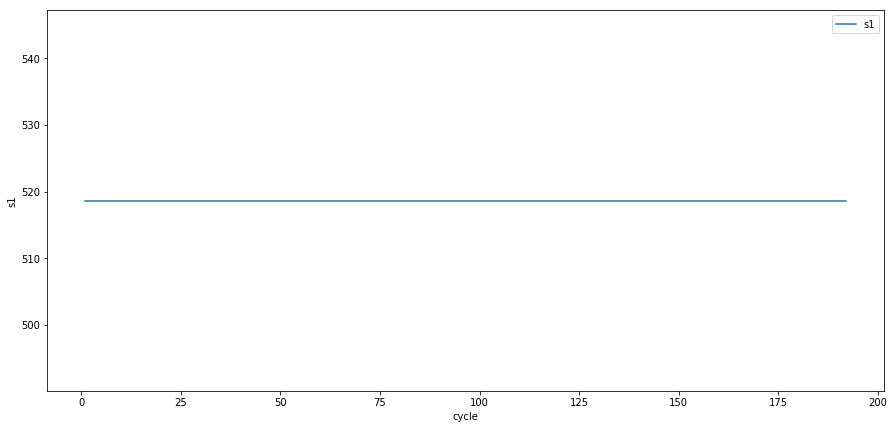

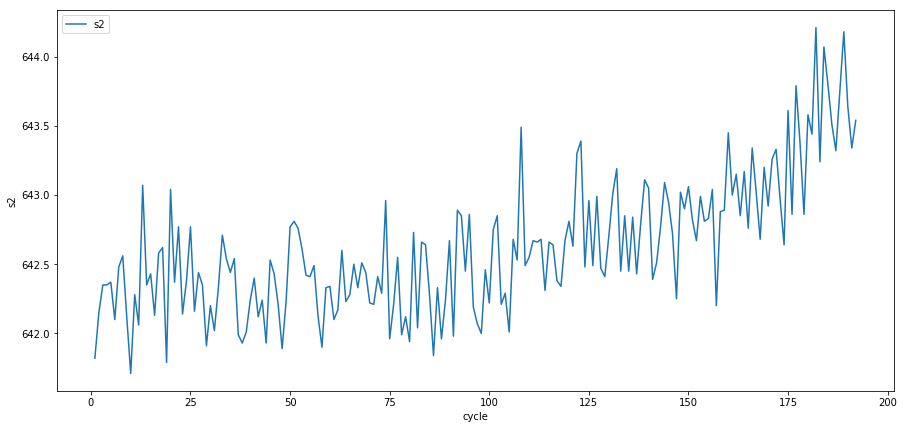

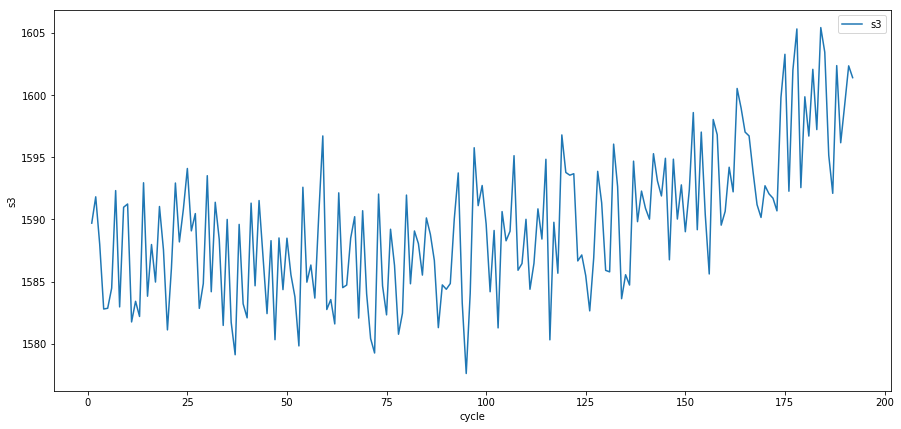

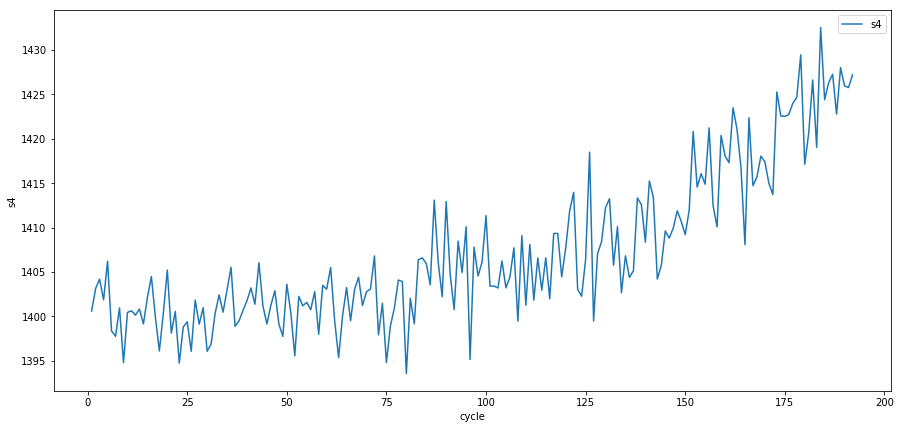

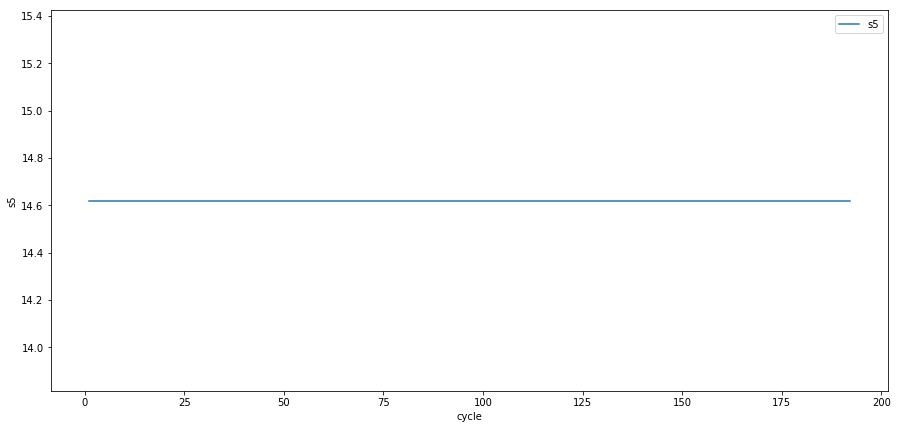

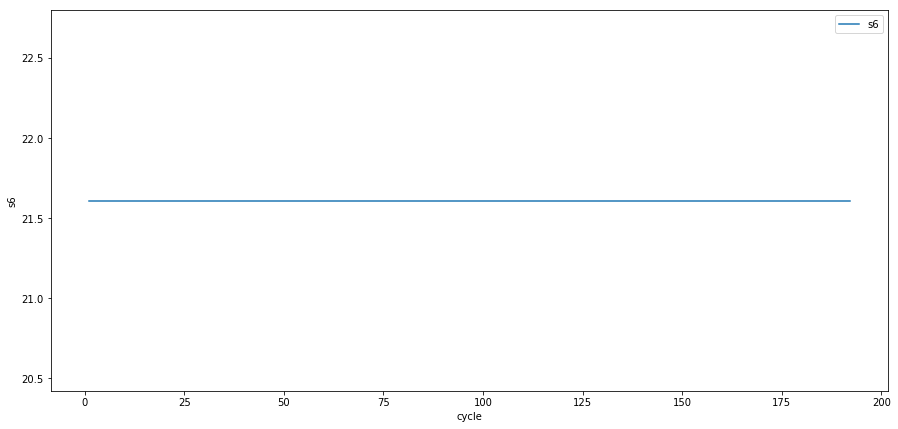

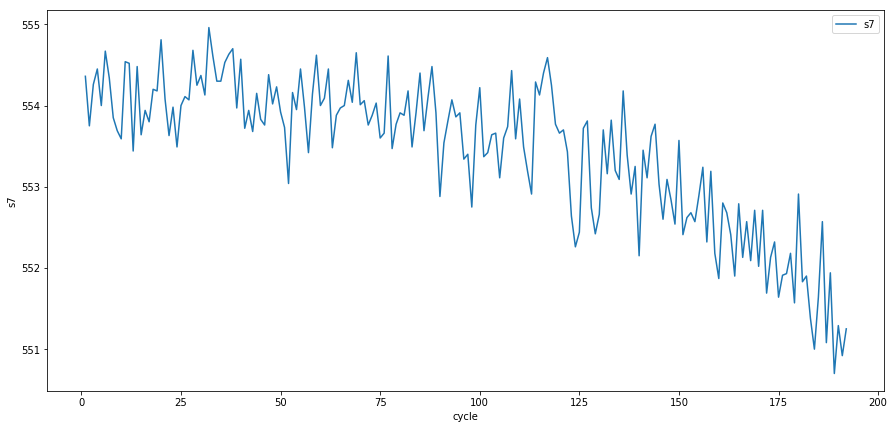

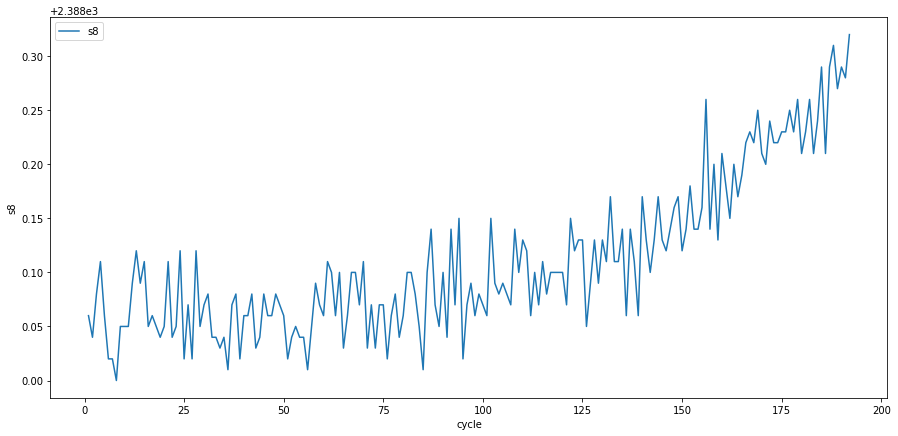

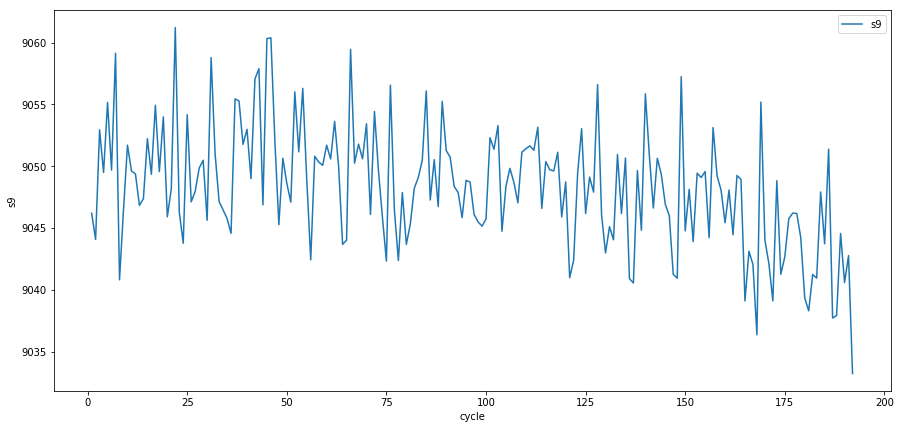

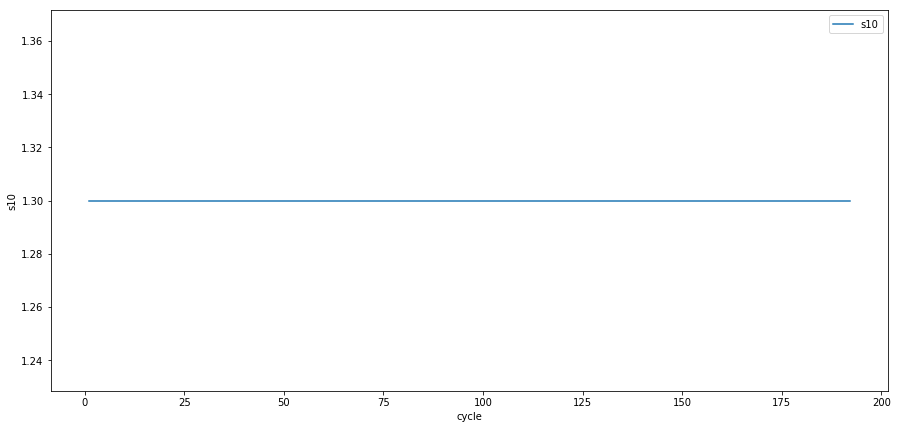

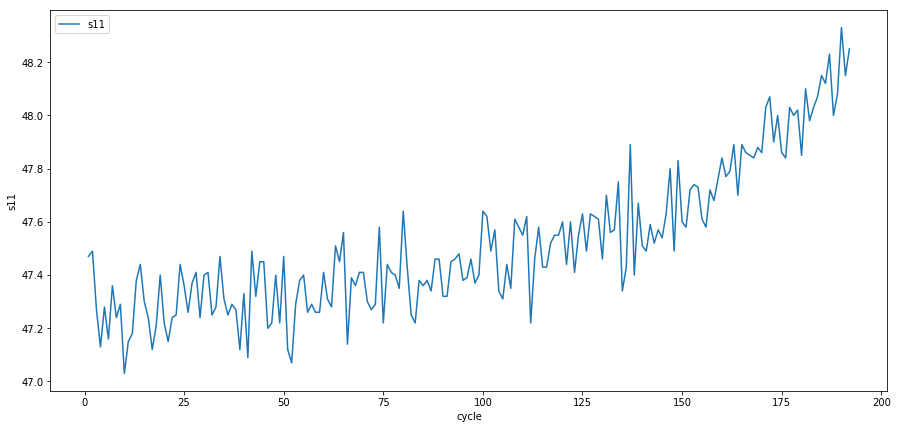

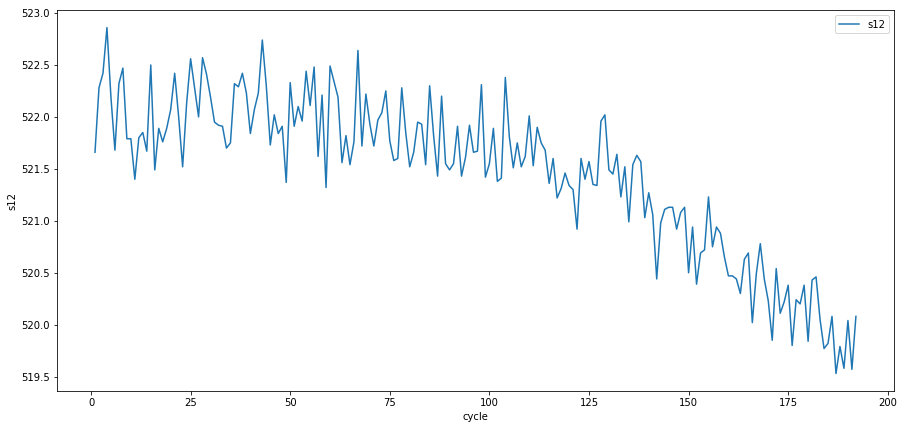

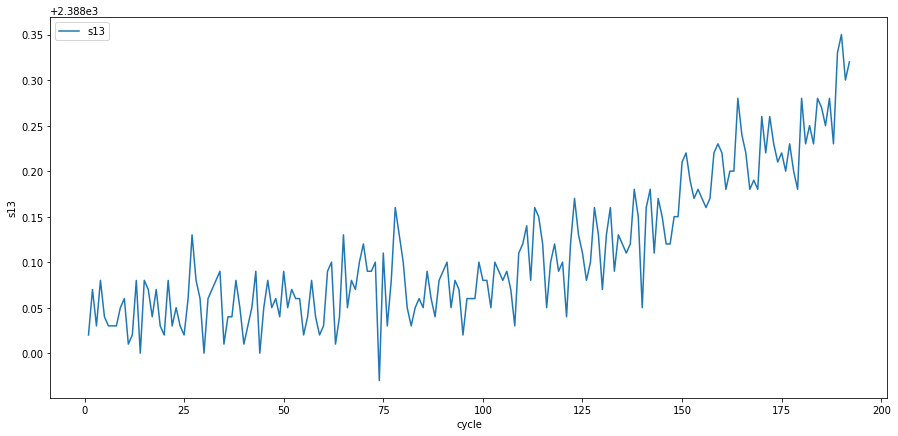

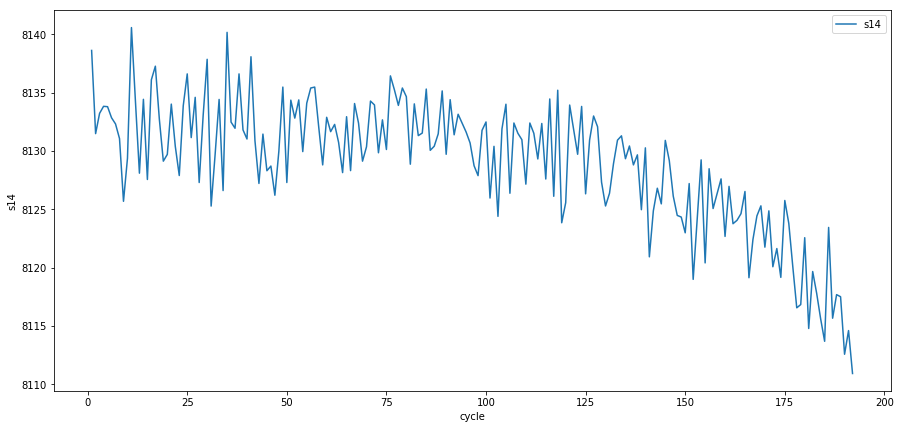

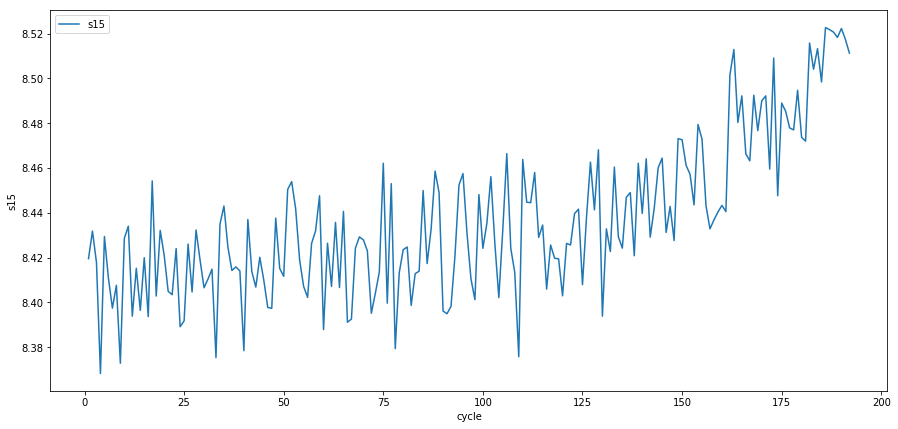

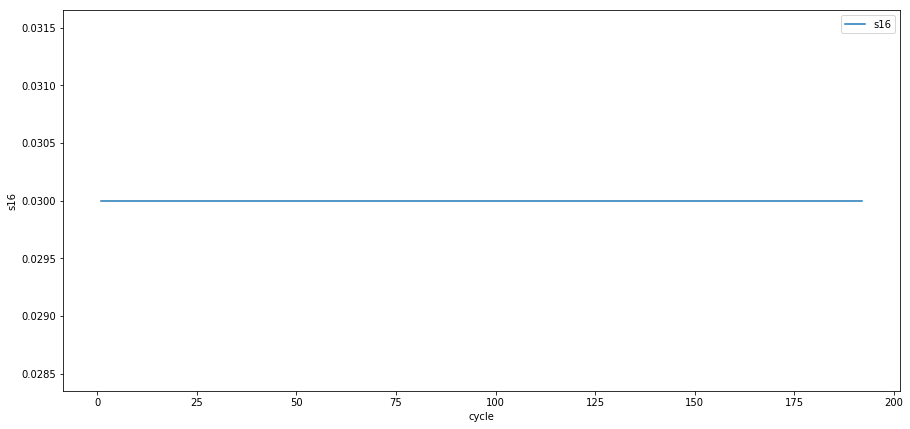

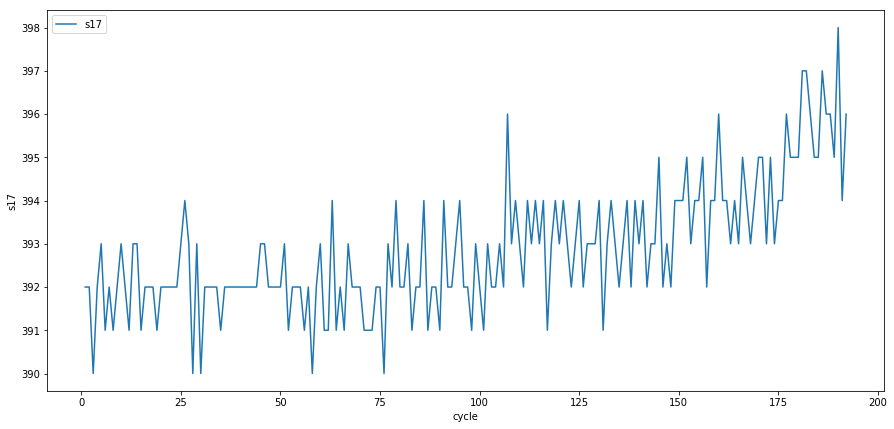

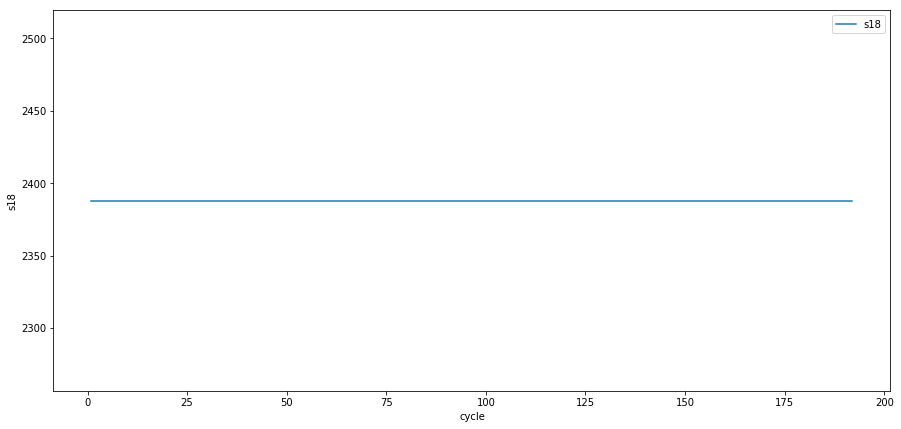

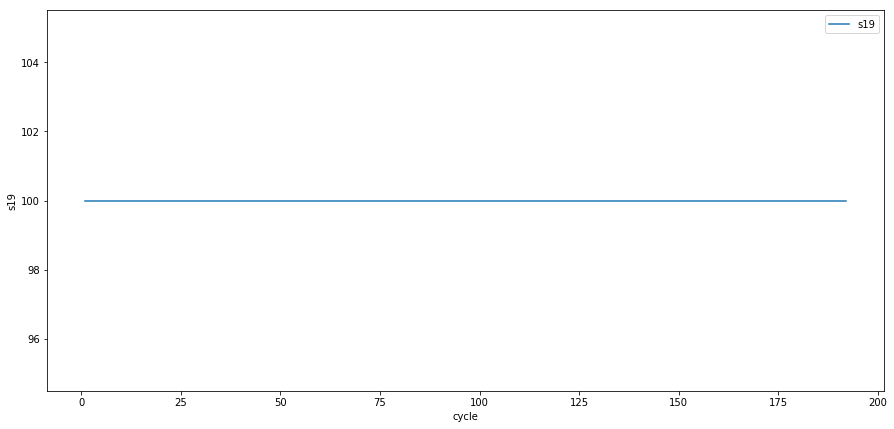

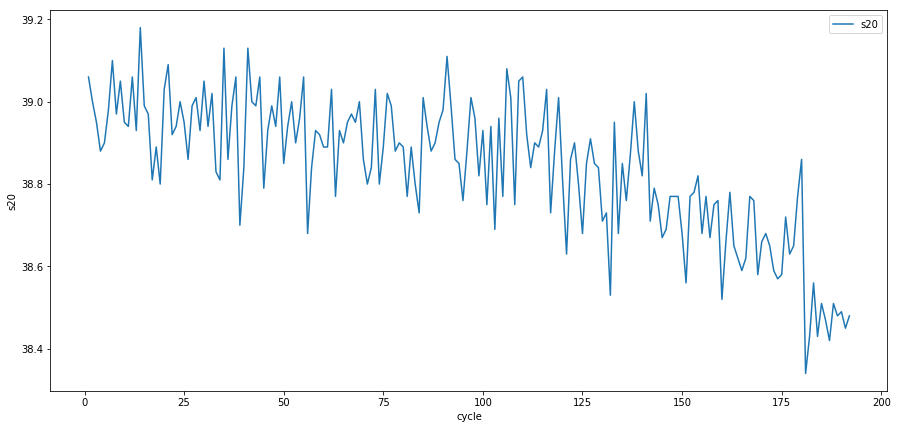

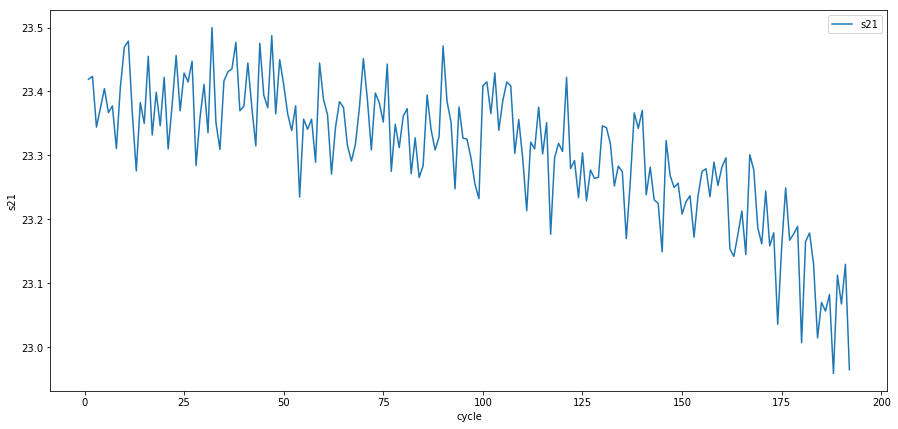

In [11]:
plt.figure(figsize(15,7))
for i in range(1, 22):
    s = 's'+ str(i)
    s1 = 's'+ str(i+1)
    motors.iloc[:192, :].plot(x='cycle', y =[s])
    plt.ylabel(s)
    pylab.show()

Проверка стационарности и STL-декомпозиция ряда:

In [ ]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(wine.sales).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales)[1])

### Стабилизация дисперсии

Сделаем преобразование Бокса-Кокса для стабилизации дисперсии:

In [ ]:
wine['sales_box'], lmbda = stats.boxcox(wine.sales)
plt.figure(figsize(15,7))
wine.sales_box.plot()
plt.ylabel(u'Transformed wine sales')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales_box)[1])

### Стационарность

Критерий Дики-Фуллера отвергает гипотезу нестационарности, но визуально в данных виден тренд. Попробуем сезонное дифференцирование; сделаем на продифференцированном ряде STL-декомпозицию и проверим стационарность:

In [ ]:
wine['sales_box_diff'] = wine.sales_box - wine.sales_box.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(wine.sales_box_diff[12:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales_box_diff[12:])[1])

Критерий Дики-Фуллера не отвергает гипотезу нестационарности, и полностью избавиться от тренда не удалось. Попробуем добавить ещё обычное дифференцирование:

In [ ]:
wine['sales_box_diff2'] = wine.sales_box_diff - wine.sales_box_diff.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(wine.sales_box_diff2[13:]).plot()   
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(wine.sales_box_diff2[13:])[1])

Гипотеза нестационарности отвергается, и визуально ряд выглядит лучше — тренда больше нет. 

## Подбор модели

Посмотрим на ACF и PACF полученного ряда:

In [ ]:
plt.figure(figsize(15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(wine.sales_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(wine.sales_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
pylab.show()

Начальные приближения: Q=1, q=2, P=1, p=4

In [ ]:
ps = range(0, 5)
d=1
qs = range(0, 3)
Ps = range(0, 2)
D=1
Qs = range(0, 2)

In [ ]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

In [ ]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(wine.sales_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Если в предыдущей ячейке возникает ошибка, убедитесь, что обновили statsmodels до версии не меньше 0.8.0rc1.

In [ ]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

Лучшая модель:

In [ ]:
print(best_model.summary())

Её остатки:

In [ ]:
plt.figure(figsize(15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

Остатки несмещены (подтверждается критерием Стьюдента) стационарны (подтверждается критерием Дики-Фуллера и визуально), неавтокоррелированы (подтверждается критерием Льюнга-Бокса и коррелограммой).
Посмотрим, насколько хорошо модель описывает данные:

In [ ]:
wine['model'] = invboxcox(best_model.fittedvalues, lmbda)
plt.figure(figsize(15,7))
wine.sales.plot()
wine.model[13:].plot(color='r')
plt.ylabel('Wine sales')
pylab.show()

### Прогноз

In [ ]:
wine2 = wine[['sales']]
date_list = [datetime.datetime.strptime("1994-09-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,36)]
future = pd.DataFrame(index=date_list, columns= wine2.columns)
wine2 = pd.concat([wine2, future])
wine2['forecast'] = invboxcox(best_model.predict(start=176, end=211), lmbda)

plt.figure(figsize(15,7))
wine2.sales.plot()
wine2.forecast.plot(color='r')
plt.ylabel('Wine sales')
pylab.show()